In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from logistic import LossFuncSum

In [2]:
from optim import sgd, svrg

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})

In [4]:
X_w5a, y_w5a = load_svmlight_file('data/w5a')
X_a9a, y_a9a = load_svmlight_file('data/a9a')

X_w5a_t, y_w5a_t = load_svmlight_file('data/w5a.t', n_features=X_w5a.shape[1])
X_a9a_t, y_a9a_t = load_svmlight_file('data/a9a.t', n_features=X_a9a.shape[1])

## Testing if SVRG speed depends on caching

In [5]:
def test_svrg_speed(X, y, save_grad, trace=True):
    fsum = LossFuncSum(X, y, reg_coef=1 / X.shape[0])
    x0 = np.zeros(X.shape[1])
    
    return svrg(fsum, x0, n_stages=3, trace=trace, save_grad=save_grad)

### For w5a (9888, 300)

In [6]:
%%time
test_svrg_speed(X_w5a, y_w5a, save_grad=True)
;

CPU times: user 1min 27s, sys: 83.3 ms, total: 1min 27s
Wall time: 1min 27s


In [7]:
%%time
test_svrg_speed(X_w5a, y_w5a, save_grad=False)
;

CPU times: user 2min 6s, sys: 110 ms, total: 2min 6s
Wall time: 2min 6s


In [14]:
tmp1 = 4 * 60 + 19
tmp2 = 6 * 60 + 28
(tmp2 - tmp1) / tmp2

0.3324742268041237

In [28]:
tmp1 = 1 * 60 + 27
tmp2 = 2 * 60 + 6
(tmp2 - tmp1) / tmp2

0.30952380952380953

In [8]:
%%time
test_svrg_speed(X_w5a, y_w5a, save_grad=True, trace=False)
;

CPU times: user 49.3 s, sys: 10 ms, total: 49.3 s
Wall time: 49.3 s


In [9]:
%%time
test_svrg_speed(X_w5a, y_w5a, save_grad=False, trace=False)
;

CPU times: user 1min 7s, sys: 66.7 ms, total: 1min 7s
Wall time: 1min 7s


In [29]:
tmp1 = 0 * 60 + 49
tmp2 = 1 * 60 + 7
(tmp2 - tmp1) / tmp2

0.26865671641791045

### For a9a (32561, 123)

In [10]:
%%time
test_svrg_speed(X_a9a, y_a9a, save_grad=True)
;

CPU times: user 4min 50s, sys: 240 ms, total: 4min 50s
Wall time: 4min 50s


In [11]:
%%time
test_svrg_speed(X_a9a, y_a9a, save_grad=False)
;

CPU times: user 6min 57s, sys: 397 ms, total: 6min 58s
Wall time: 6min 57s


In [30]:
tmp1 = 4 * 60 + 50
tmp2 = 6 * 60 + 57
(tmp2 - tmp1) / tmp2

0.30455635491606714

In [12]:
%%time
test_svrg_speed(X_a9a, y_a9a, save_grad=True, trace=False)
;

CPU times: user 2min 53s, sys: 86.7 ms, total: 2min 53s
Wall time: 2min 53s


In [13]:
%%time
test_svrg_speed(X_a9a, y_a9a, save_grad=False, trace=False)
;

CPU times: user 4min, sys: 200 ms, total: 4min
Wall time: 4min


In [31]:
tmp1 = 2 * 60 + 53
tmp2 = 4 * 60 + 0
(tmp2 - tmp1) / tmp2

0.2791666666666667

<br>
<br>
<br>

# Testing SGD and SVRG methods

In [5]:
from matplotlib import cm

In [63]:
def plot_sgd(Ns, hist_sgd, zoom1=None, zoom2=None, title='', save_name=''):
    plt.figure(figsize=(16, 12))
    plt.suptitle(title)
    ax1 = plt.subplot(211)
    for i, hist in zip(Ns, hist_sgd):
        plt.plot(hist['epoch'], hist['f'], label='step={}'.format(10 ** -i),
                 c=cm.rainbow(i / len(Ns)), linewidth=2)
        if zoom1:
            plt.ylim(zoom1)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.ylabel('Function value')
        plt.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
        plt.grid(True)

    plt.subplot(212, sharex=ax1)
    for i, hist in enumerate(hist_sgd):
        plt.plot(hist['epoch'], hist['norm_g'],
                 c=cm.rainbow(i / len(Ns)), linewidth=2)
        if zoom2:
            plt.ylim(zoom2)
        plt.xlabel('Epoch')
        plt.ylabel('Gradient norm')
        plt.grid(True)
        
    if save_name:
        plt.savefig("pics/" + save_name, bbox_inches='tight')
    plt.show()

In [7]:
def plot_svrg(Ms, hist_svrg, zoom1=None, zoom2=None, title='', save_name=''):
    part_Ms = np.linspace(1, 3, len(Ms))
    plt.figure(figsize=(16, 12))
    plt.suptitle(title)
    ax1 = plt.subplot(211)
    for j, (i, hist) in enumerate(zip(Ms, hist_svrg)):
        plt.plot(hist['epoch'], hist['f'], label='m={} ({:.2f}n)'.format(i, part_Ms[j]),
                 c=cm.rainbow(j / len(Ms)), linewidth=2)
        if zoom1:
            plt.ylim(zoom1)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.ylabel('Function value')
        plt.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
        plt.grid(True)

    plt.subplot(212, sharex=ax1)
    for j, (i, hist) in enumerate(zip(Ms, hist_svrg)):
        plt.plot(hist['epoch'], hist['norm_g'],
                 c=cm.rainbow(j / len(Ms)), linewidth=2)
        if zoom2:
            plt.ylim(zoom2)
        plt.xlabel('Epoch')
        plt.ylabel('Gradient norm')
        plt.grid(True)
        
    if save_name:
        plt.savefig("pics/" + save_name, bbox_inches='tight')
    plt.show()

## Logreg

In [ ]:
from logistic import predict_labels

In [ ]:
def calc_error(A_test, x):
    b_hat = predict_labels(A_test, x)
    err = np.mean(b_test != b_hat)
    return err

In [8]:
def test_sgd(X, y, step_size=0.01):
    fsum = LossFuncSum(X, y, reg_coef=1 / X.shape[0])
    x0 = np.zeros(X.shape[1])

    return sgd(fsum, x0, n_iters=10 * fsum.n_funcs, step_size=step_size, trace=True)

def test_svrg(X, y, n_inner_iters=None):
    fsum = LossFuncSum(X, y, reg_coef=1 / X.shape[0])
    x0 = np.zeros(X.shape[1])
    
    return svrg(fsum, x0, n_stages=3, n_inner_iters=n_inner_iters, trace=True, save_grad=True)

### w5a

In [9]:
%%time
N = 5
Ns = range(N + 1)

x_sgd_w5a = []
hist_sgd_w5a = []
for n in Ns:
    x, hist = test_sgd(X_w5a, y_w5a, step_size=10 ** -n)
    x_sgd_w5a += [x]
    hist_sgd_w5a += [hist]

CPU times: user 5min 56s, sys: 110 ms, total: 5min 56s
Wall time: 5min 56s


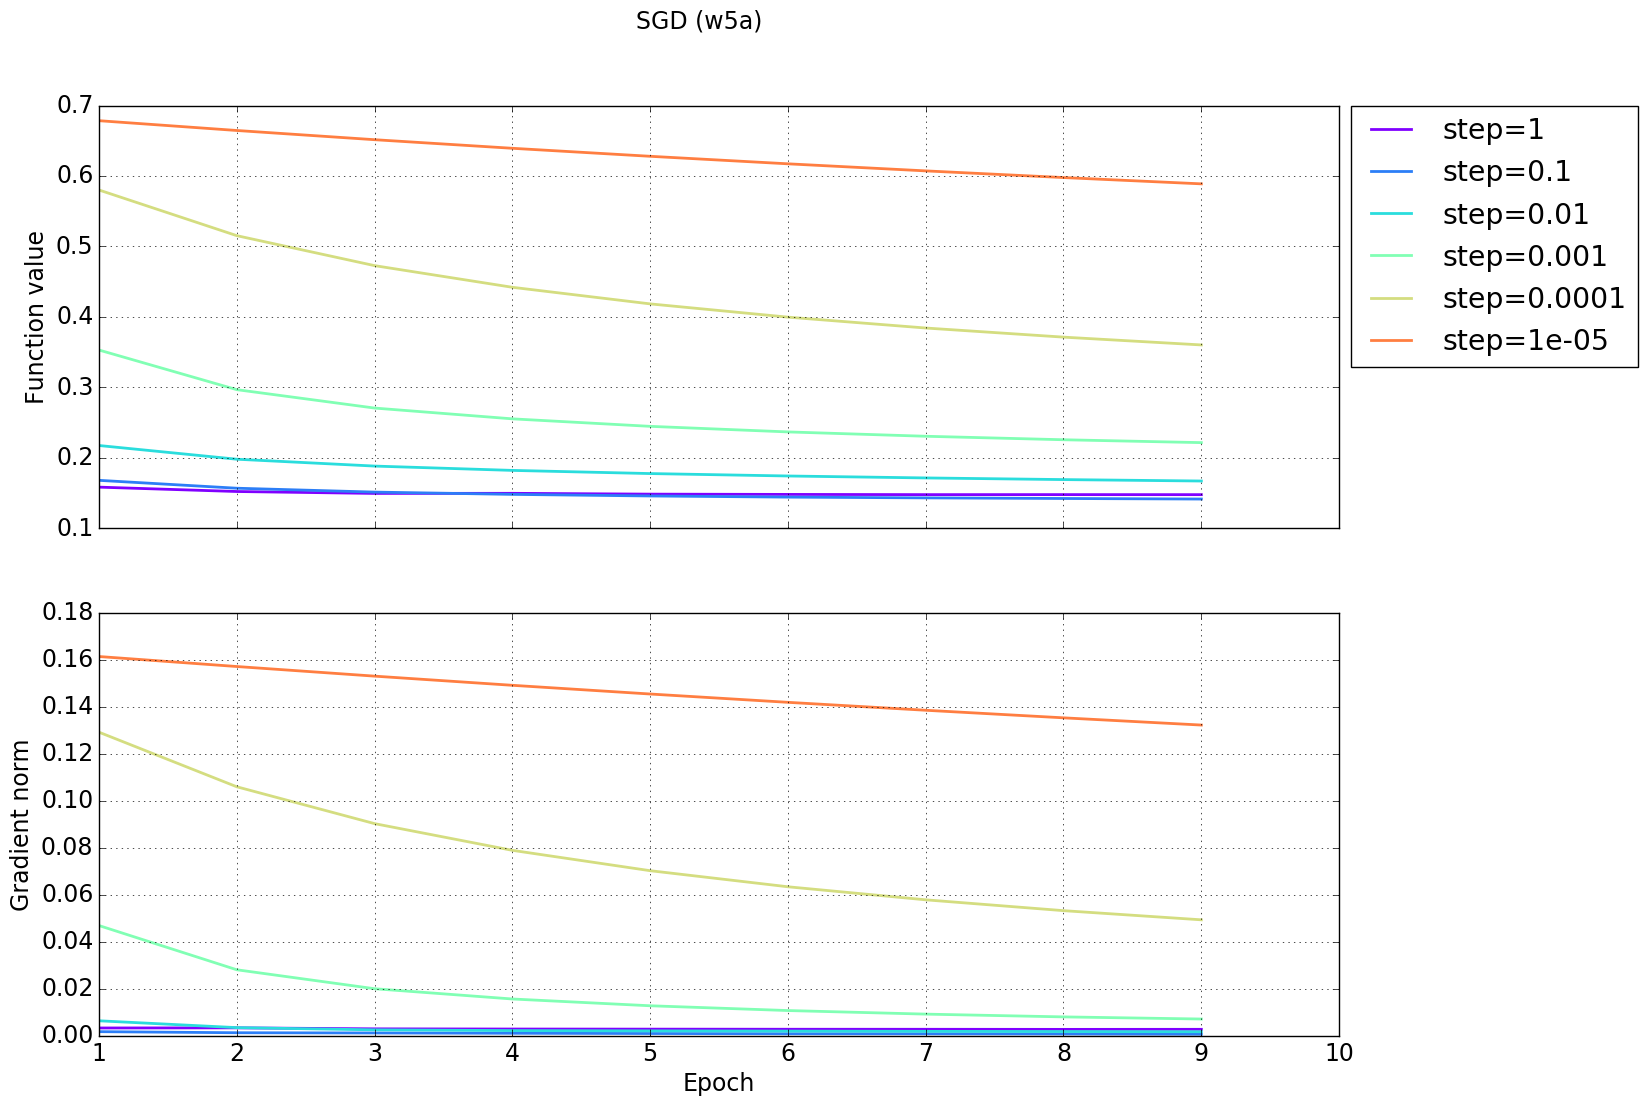

In [22]:
plot_sgd(Ns, hist_sgd_w5a, title='SGD (w5a)', save_name='sgd_w5a')

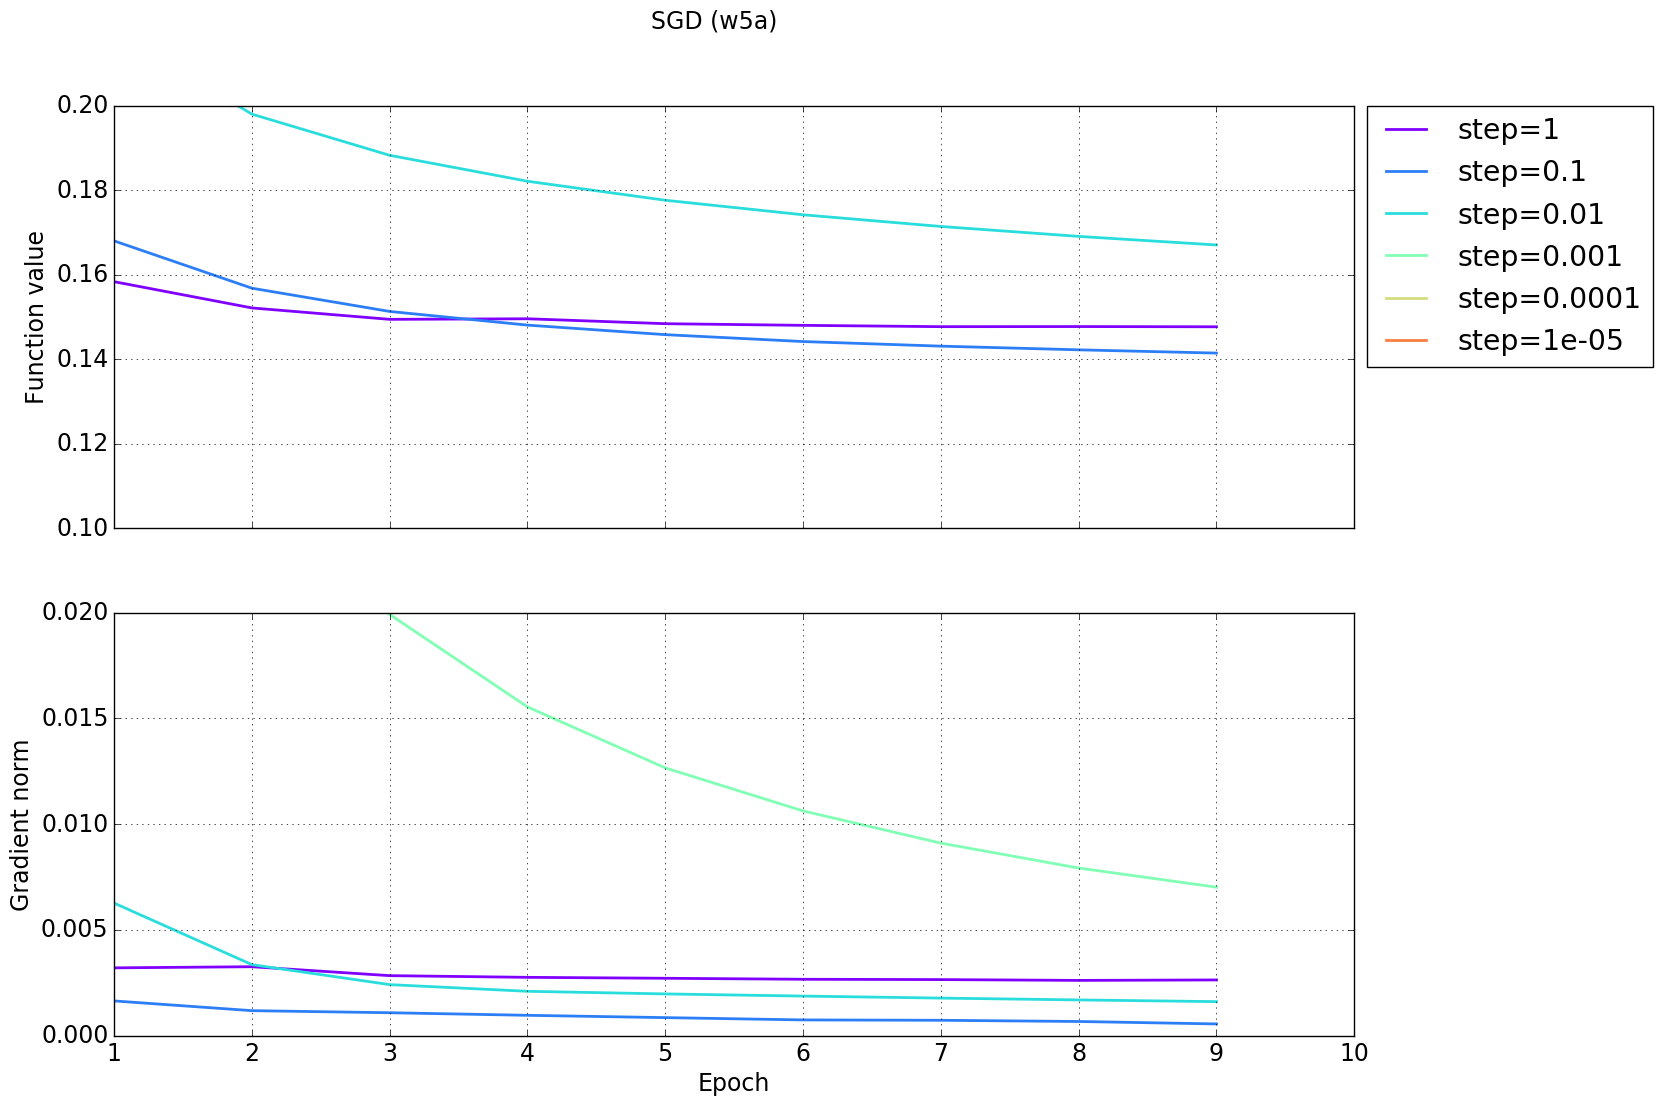

In [23]:
plot_sgd(Ns, hist_sgd_w5a, zoom1=(0.1, 0.2), zoom2=(0, 0.02), title='SGD (w5a)', save_name='sgd_w5a_zoomed')

In [10]:
%%time
n = X_w5a.shape[0]
M = 5
Ms = np.linspace(n, 3 * n, M, dtype=np.int)

x_svrg_w5a = []
hist_svrg_w5a = []
for m in Ms:
    x, hist = test_svrg(X_w5a, y_w5a, n_inner_iters=m)
    x_svrg_w5a += [x]
    hist_svrg_w5a += [hist]

CPU times: user 7min 4s, sys: 230 ms, total: 7min 4s
Wall time: 7min 4s


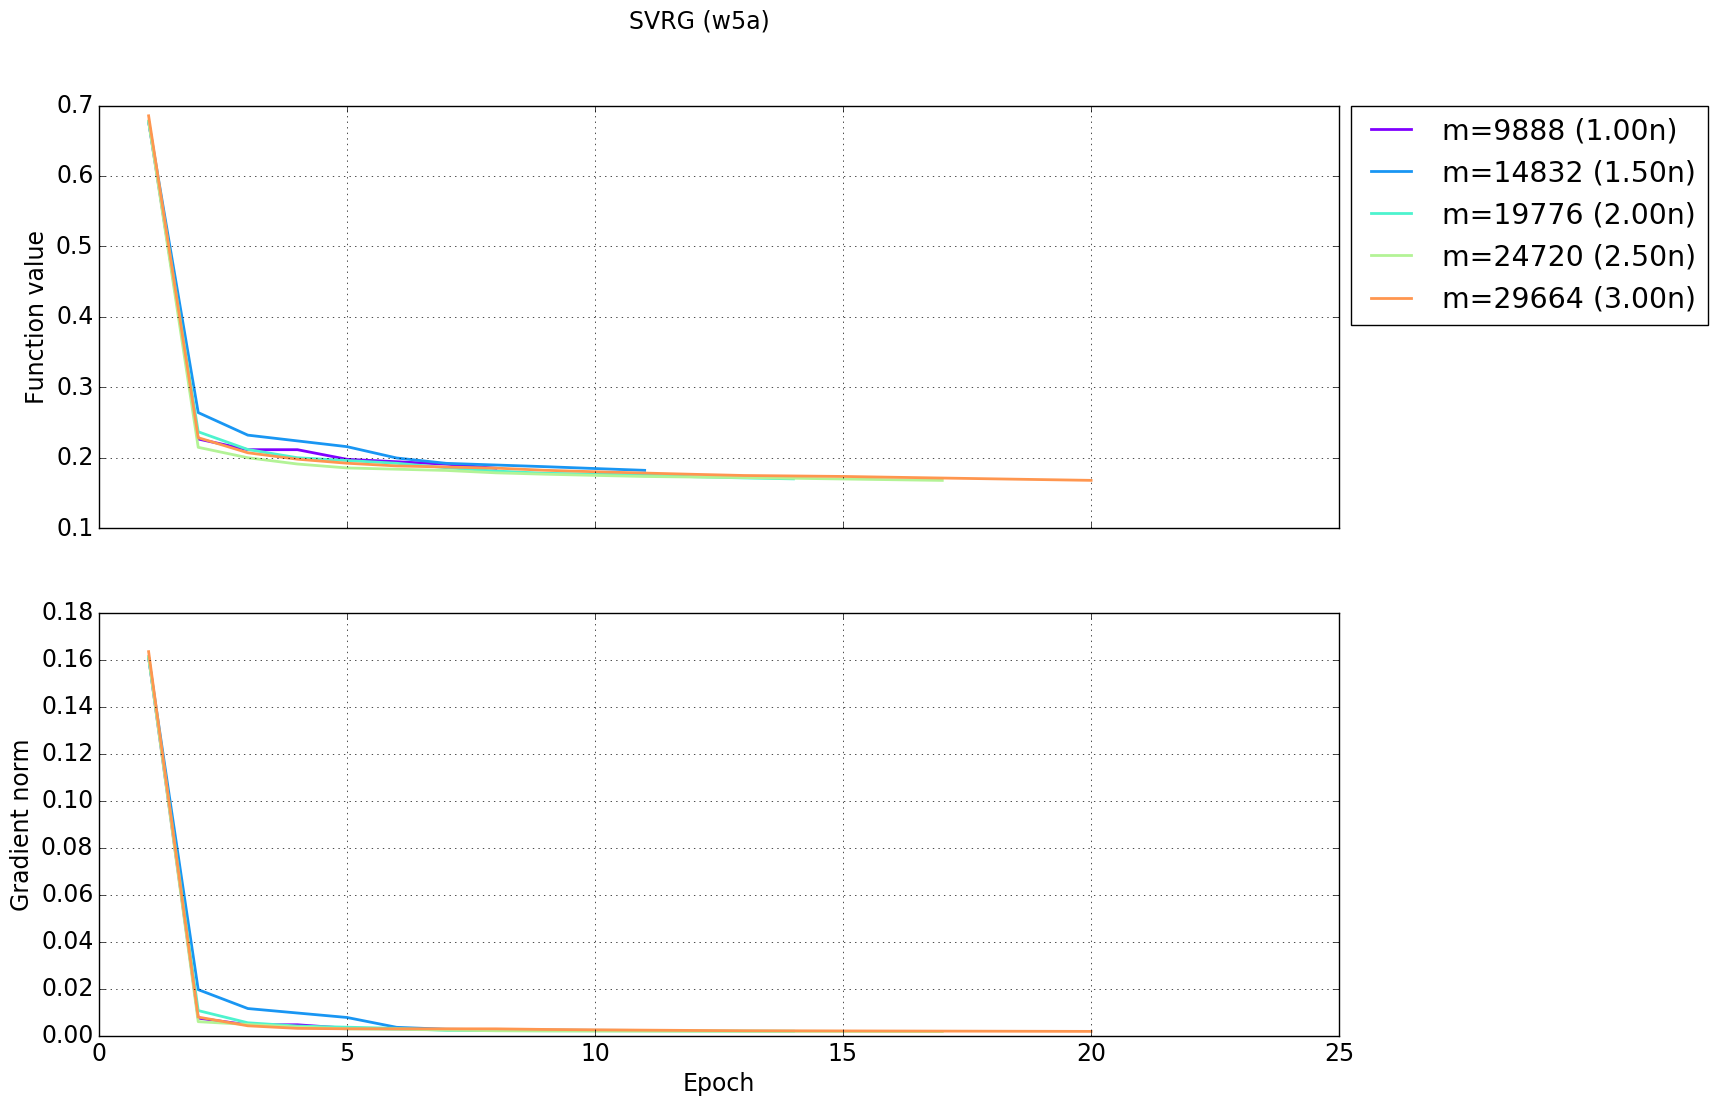

In [24]:
n = X_w5a.shape[0]
M = 5
Ms = np.linspace(n, 3 * n, M, dtype=np.int)
plot_svrg(Ms, hist_svrg_w5a, title='SVRG (w5a)', save_name='svrg_w5a')

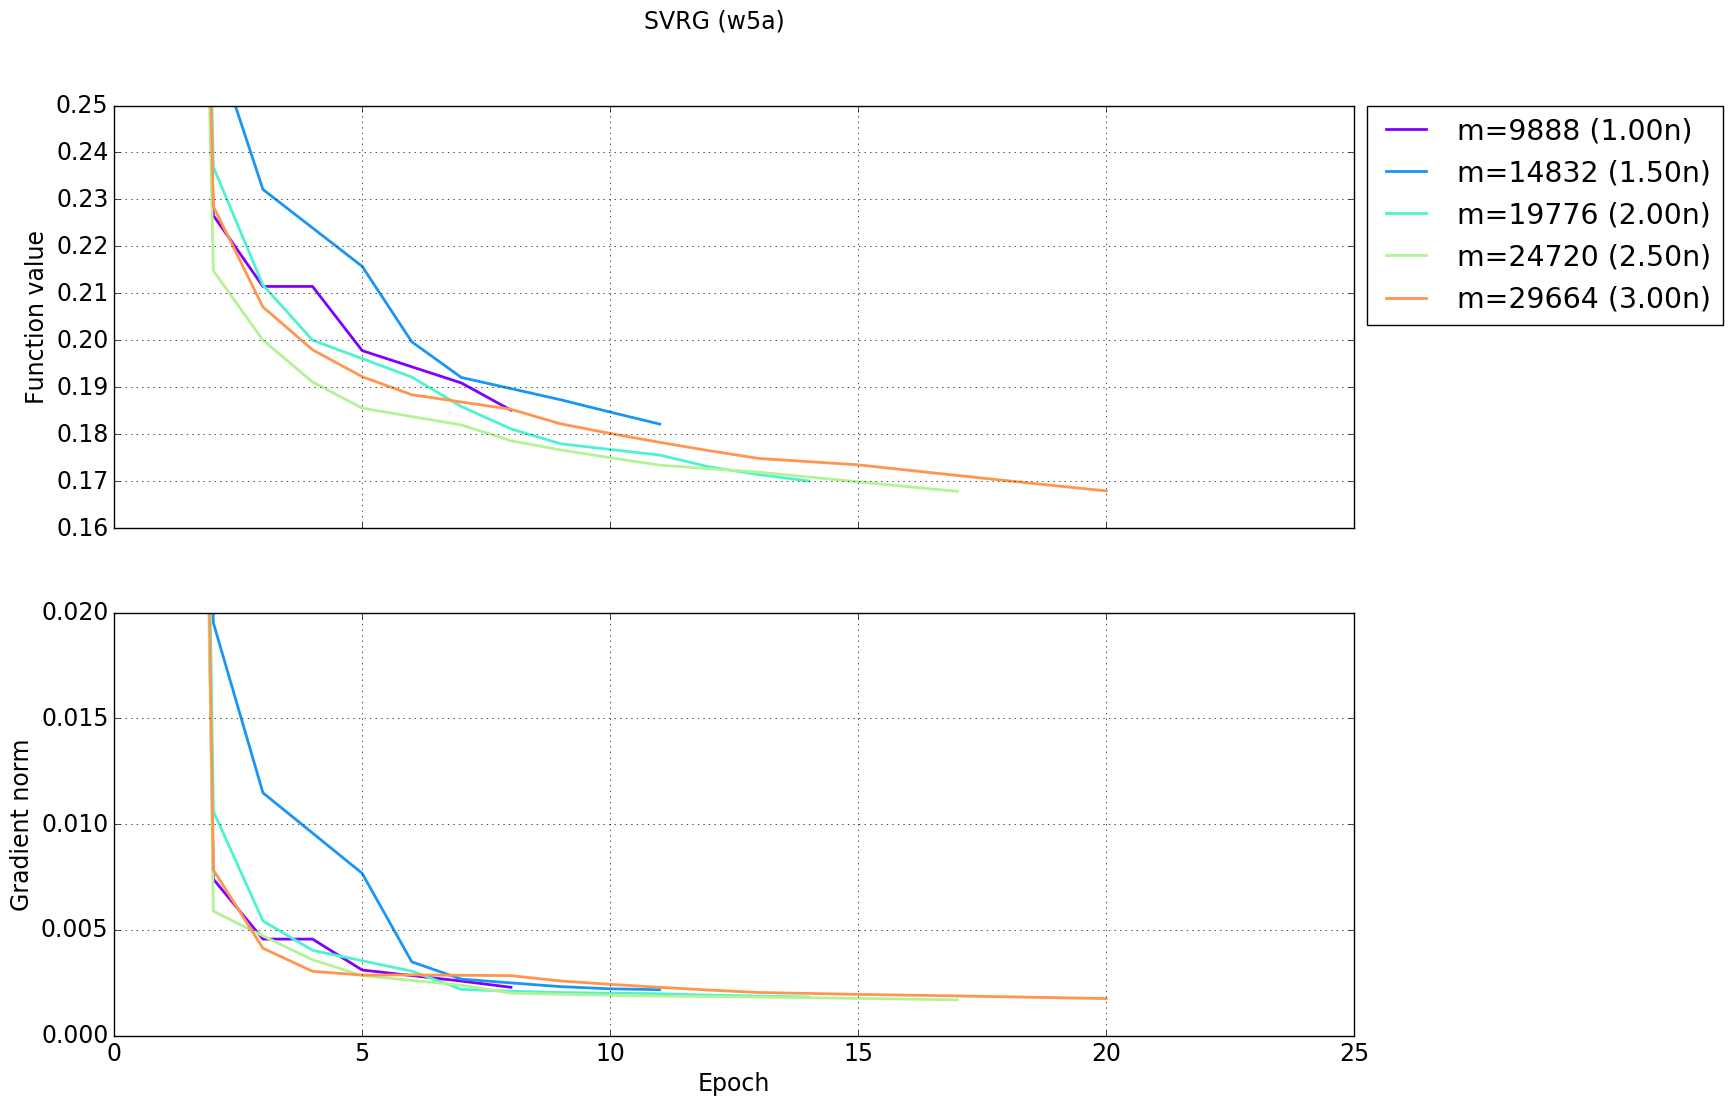

In [26]:
plot_svrg(Ms, hist_svrg_w5a, zoom1=(0.16, 0.25), zoom2=(0, 0.02), title='SVRG (w5a)', save_name='svrg_w5a_zoomed')

### a9a

In [11]:
%%time
N = 5
Ns = range(N + 1)

x_sgd_a9a = []
hist_sgd_a9a = []
for n in Ns:
    x, hist = test_sgd(X_a9a, y_a9a, step_size=10 ** -n)
    x_sgd_a9a += [x]
    hist_sgd_a9a += [hist]

CPU times: user 20min 27s, sys: 850 ms, total: 20min 28s
Wall time: 20min 27s


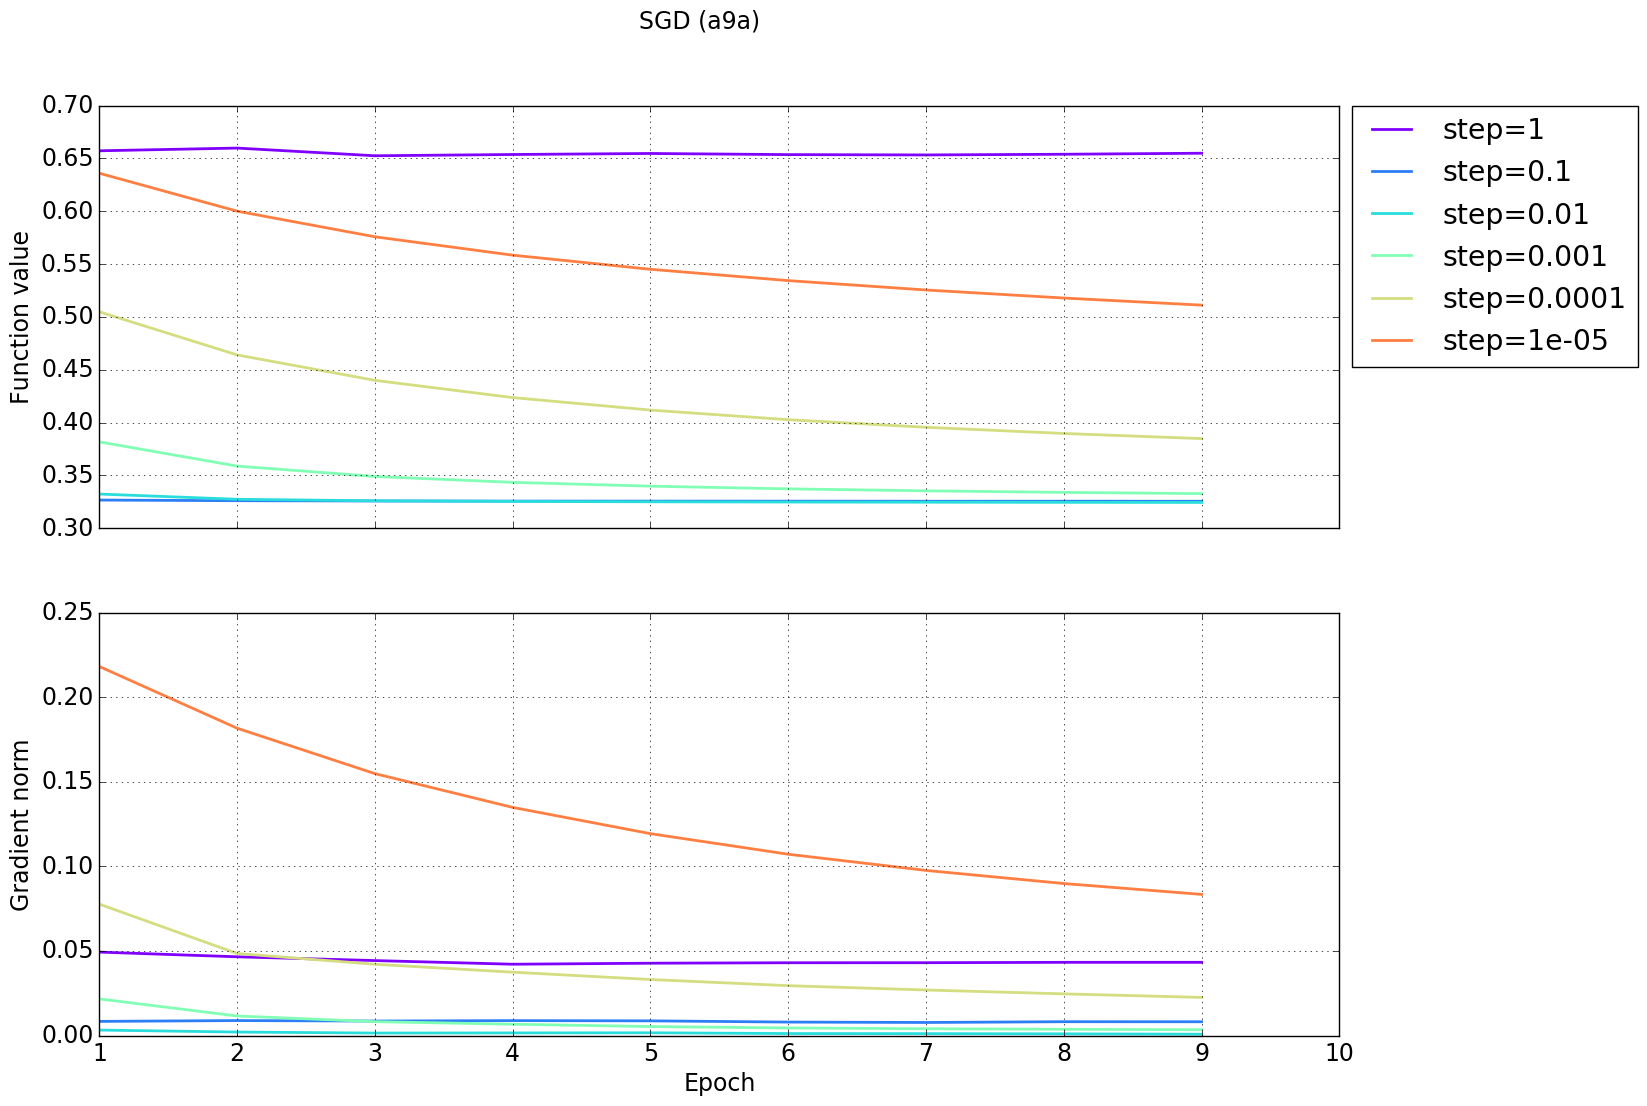

In [27]:
plot_sgd(Ns, hist_sgd_a9a, title='SGD (a9a)', save_name='sgd_a9a')

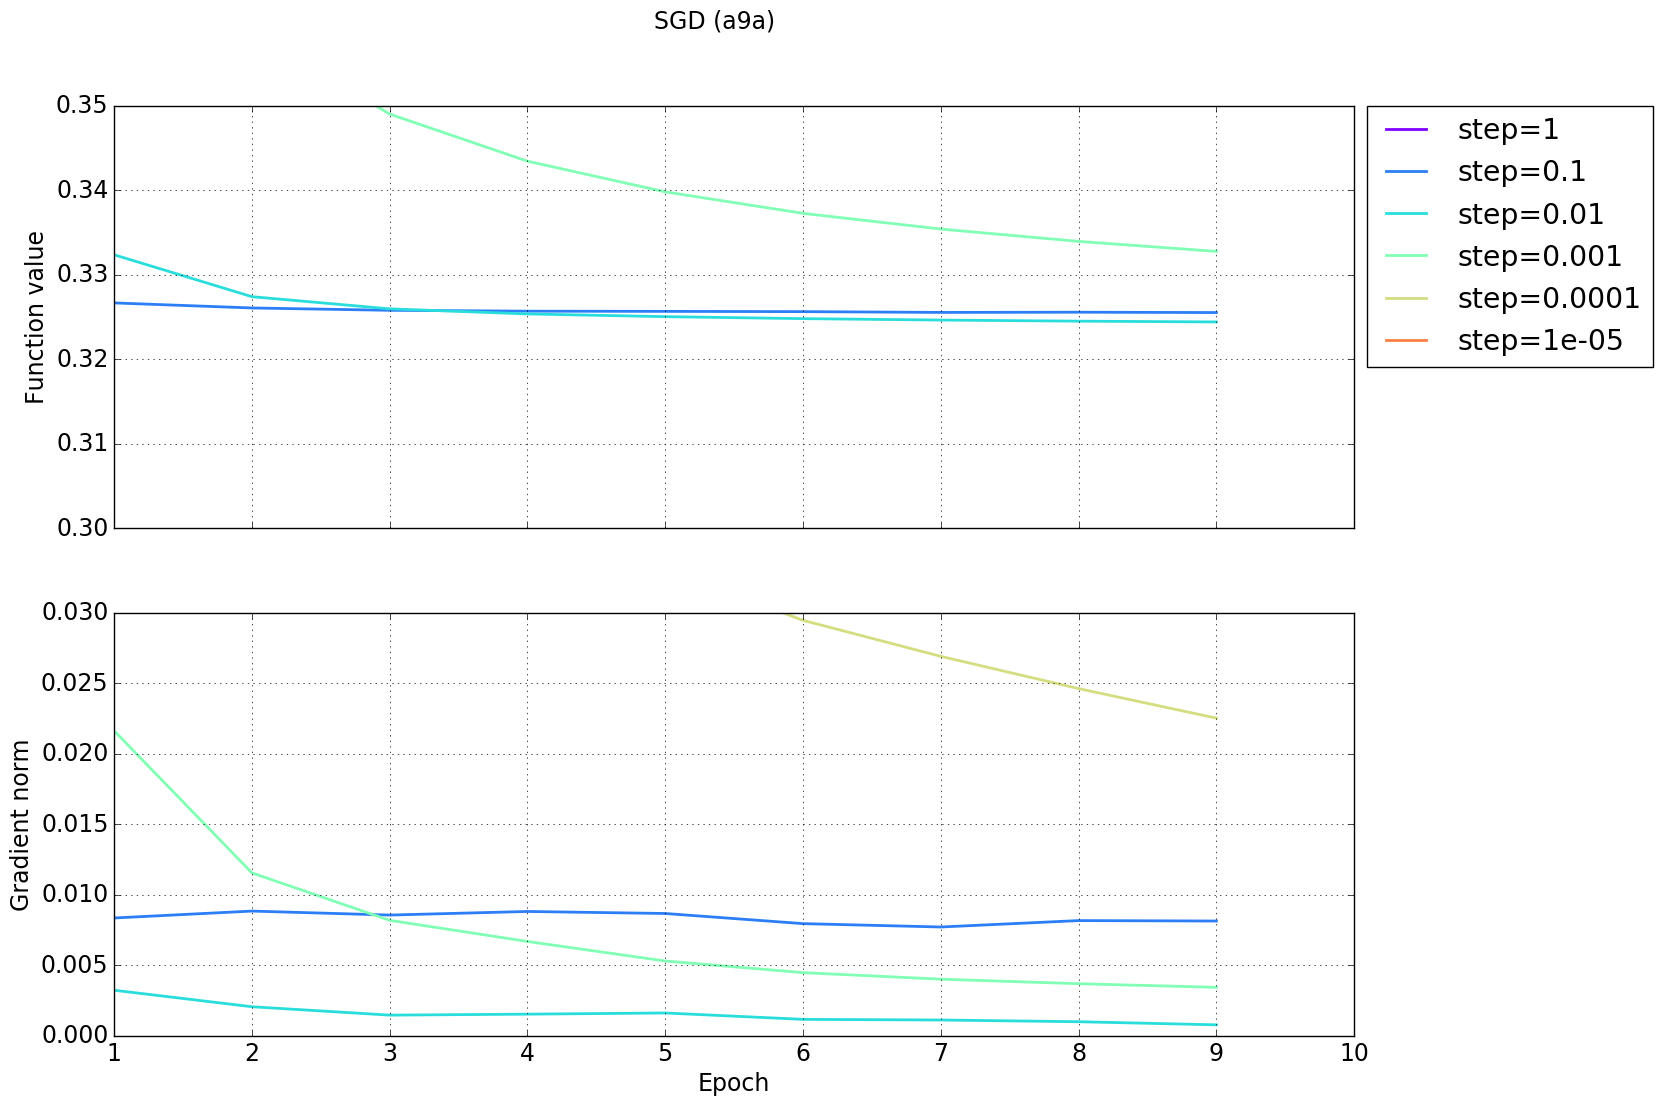

In [28]:
plot_sgd(Ns, hist_sgd_a9a, zoom1=(0.3, 0.35), zoom2=(0, 0.03), title='SGD (a9a)', save_name='sgd_a9a_zoomed')

In [12]:
%%time
n = X_a9a.shape[0]
M = 5
Ms = np.linspace(n, 3 * n, M, dtype=np.int)

x_svrg_a9a = []
hist_svrg_a9a = []
for m in Ms:
    x, hist = test_svrg(X_a9a, y_a9a, n_inner_iters=m)
    x_svrg_a9a += [x]
    hist_svrg_a9a += [hist]

CPU times: user 23min 58s, sys: 1.01 s, total: 23min 59s
Wall time: 23min 58s


In [29]:
n = X_a9a.shape[0]
M = 5
Ms = np.linspace(n, 3 * n, M, dtype=np.int)

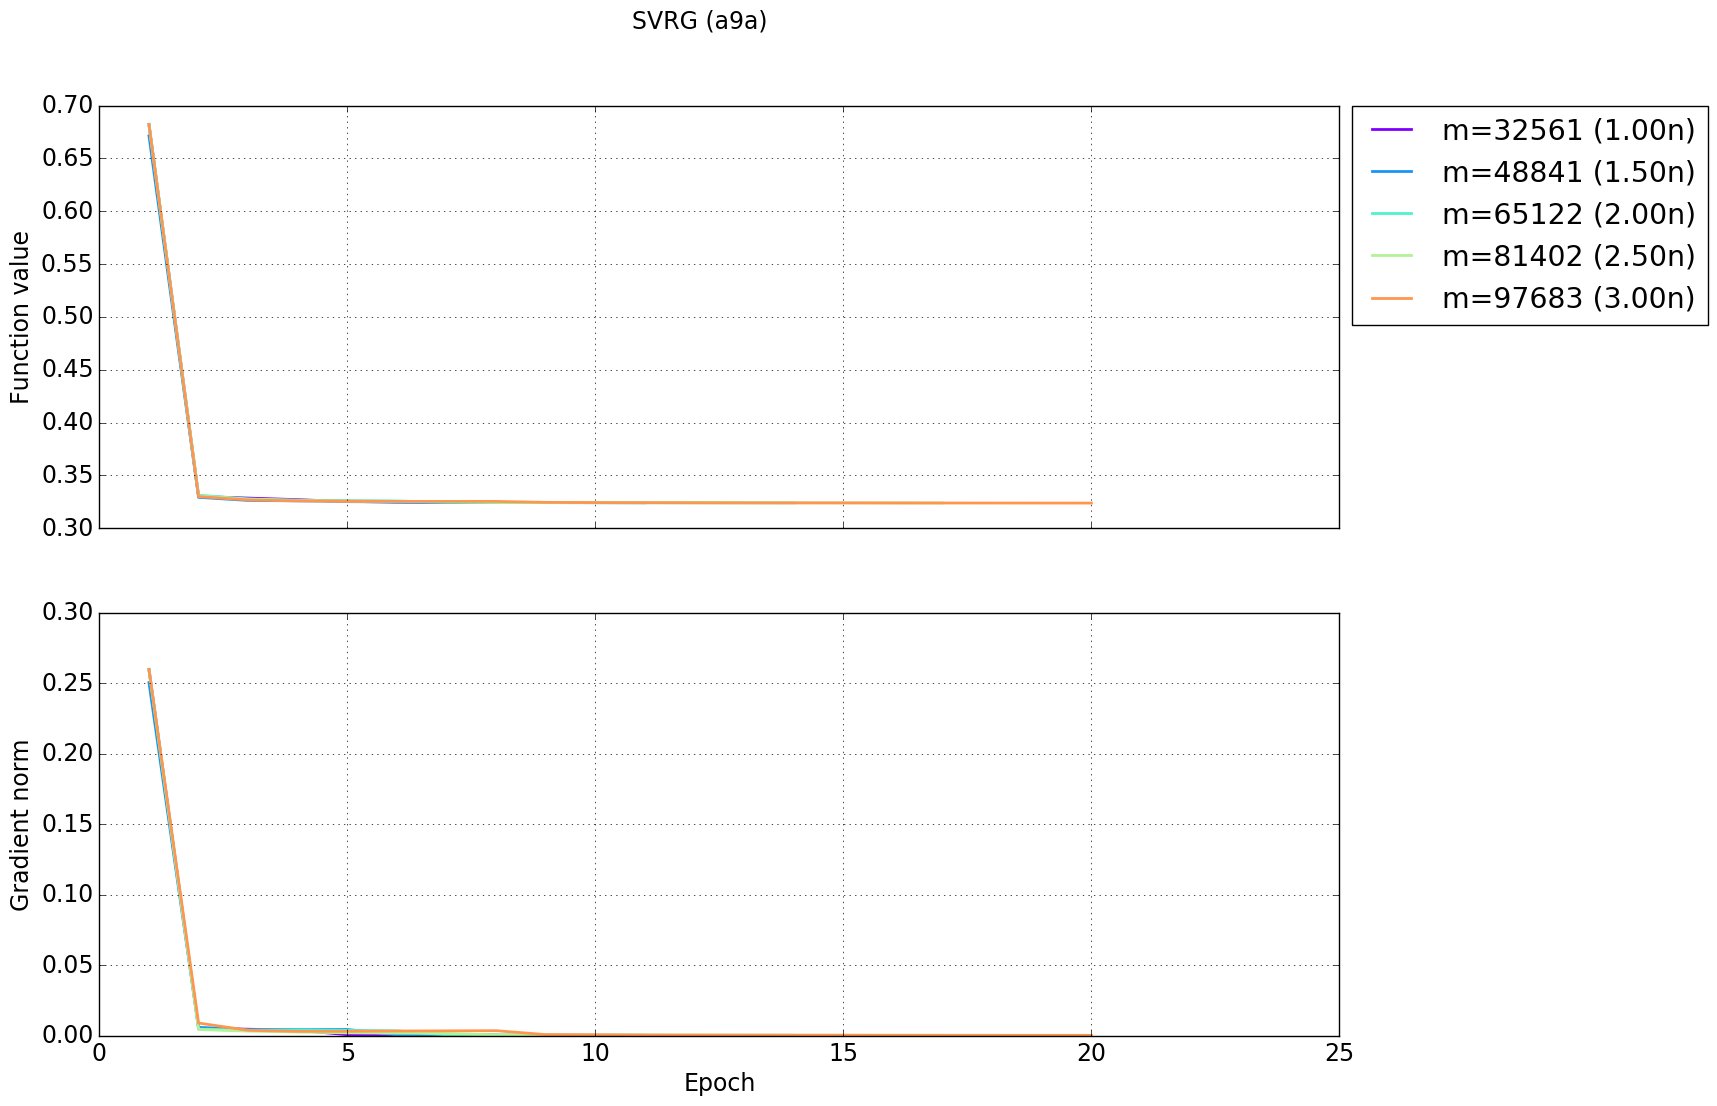

In [30]:
plot_svrg(Ms, hist_svrg_a9a, title='SVRG (a9a)', save_name='svrg_a9a')

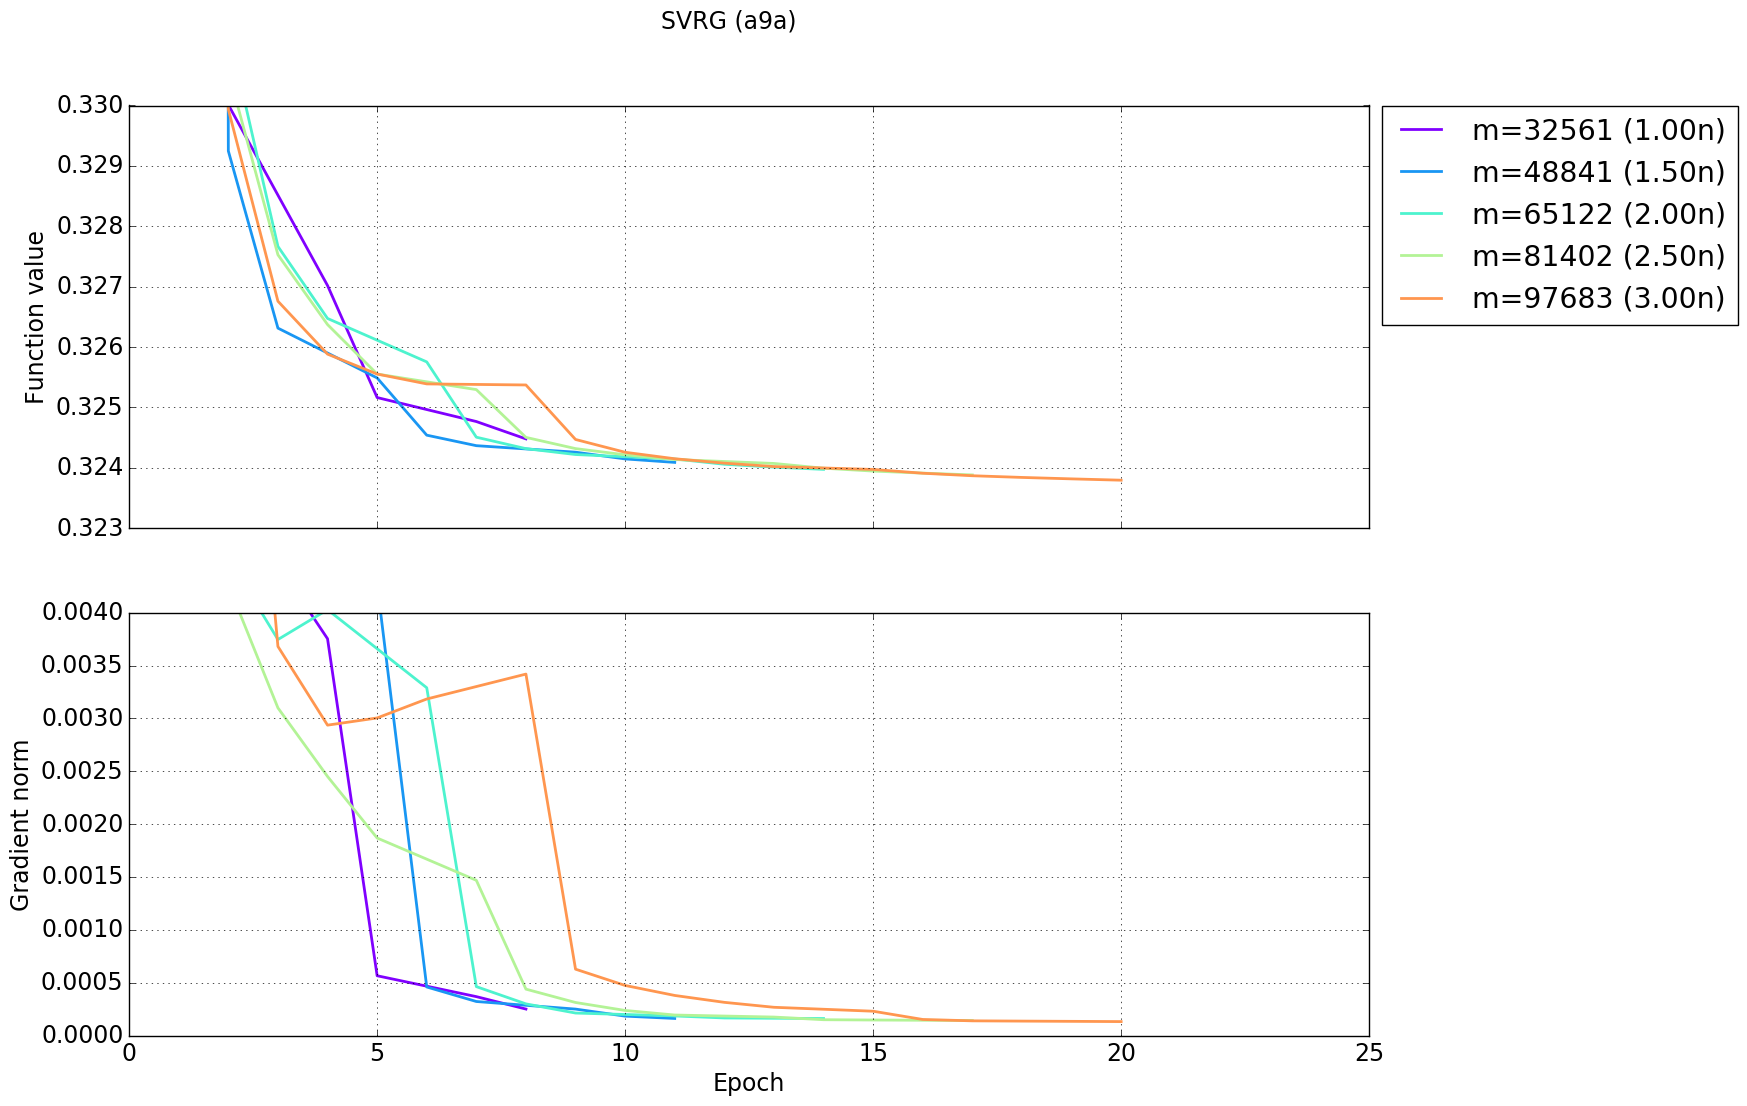

In [36]:
plot_svrg(Ms, hist_svrg_a9a, zoom1=(0.323, 0.33), zoom2=(0, 0.004), title='SVRG (a9a)', save_name='svrg_a9a_zoomed')

## Autoencoder

In [13]:
from sklearn.datasets import load_digits
from scipy.special import expit
from autoencoder import LossFuncSum, n_params_total

In [14]:
digits = load_digits()
A = digits['data']
labels = digits['target']
A = A / np.max(A)

In [15]:
def test_sgd_ae(A, arch, step_size=0.01):
    fsum = LossFuncSum(A, arch)

    np.random.seed(0)
    x0 = np.random.randn(n_params_total(arch))

    return sgd(fsum, x0, n_iters=10 * fsum.n_funcs, step_size=step_size, trace=True)

def test_svrg_ae(A, arch, n_inner_iters=None):
    fsum = LossFuncSum(A, arch)

    np.random.seed(0)
    x0 = np.random.randn(n_params_total(arch))
    
    return svrg(fsum, x0, n_stages=3, n_inner_iters=n_inner_iters, trace=True, save_grad=True)

### $s = 3; d_1 = d_3 = 64; d_2 = 2; \sigma_2(x) = x; \sigma_3(x) = sigm(x)$

In [16]:
# Define (element-wise) identity function and its derivative
linfun = (lambda x: x)
dlinfun = (lambda x: np.ones_like(x))
# Define (element-wise) sigmoid function and its derivative
sigmfun = expit
dsigmfun = (lambda x: expit(x) * (1 - expit(x)))
# Describe autoencoder architecture
arch = {
    'n_layers': 3,                 # Number of layers: s
    'sizes': [64, 2, 64],          # Layer sizes: d_1, d_2, d_3
    'afuns': [linfun, sigmfun],    # Activation functions: sigma_2, sigma_3
    'dafuns': [dlinfun, dsigmfun], # Derivatives of act. functions: sigma_2', sigma_3'
}

In [17]:
%%time
N = 5
Ns = range(N + 1)

x_sgd_I = []
hist_sgd_I = []
for n in Ns:
    x, hist = test_sgd_ae(A, arch, step_size=10 ** -n)
    x_sgd_I += [x]
    hist_sgd_I += [hist]

CPU times: user 14.9 s, sys: 0 ns, total: 14.9 s
Wall time: 14.9 s


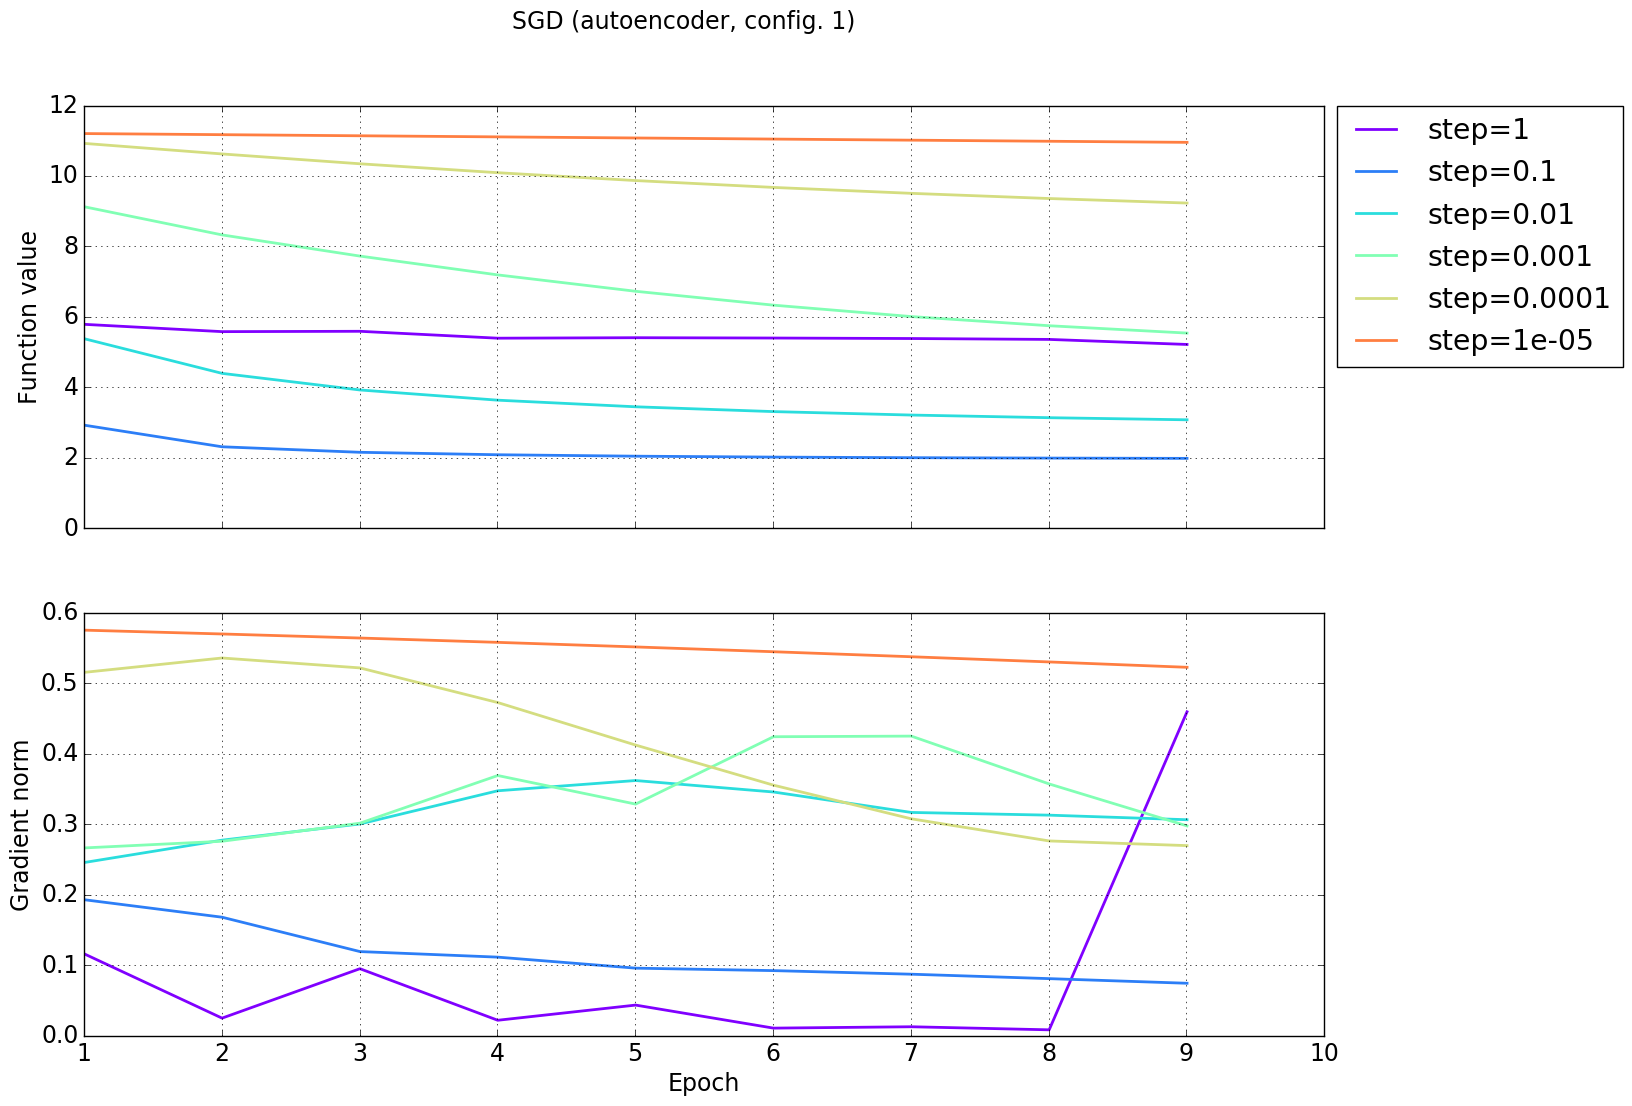

In [42]:
plot_sgd(Ns, hist_sgd_I, title='SGD (autoencoder, config. 1)', save_name='sgd_autoencoder_conf1')

In [18]:
%%time
n = A.shape[0]
M = 5
Ms = np.linspace(n, 3 * n, M, dtype=np.int)

x_svrg_I = []
hist_svrg_I = []
for m in Ms:
    x, hist = test_svrg_ae(A, arch, n_inner_iters=m)
    x_svrg_I += [x]
    hist_svrg_I += [hist]

CPU times: user 18.5 s, sys: 23.3 ms, total: 18.5 s
Wall time: 18.5 s


In [38]:
n = A.shape[0]
M = 5
Ms = np.linspace(n, 3 * n, M, dtype=np.int)

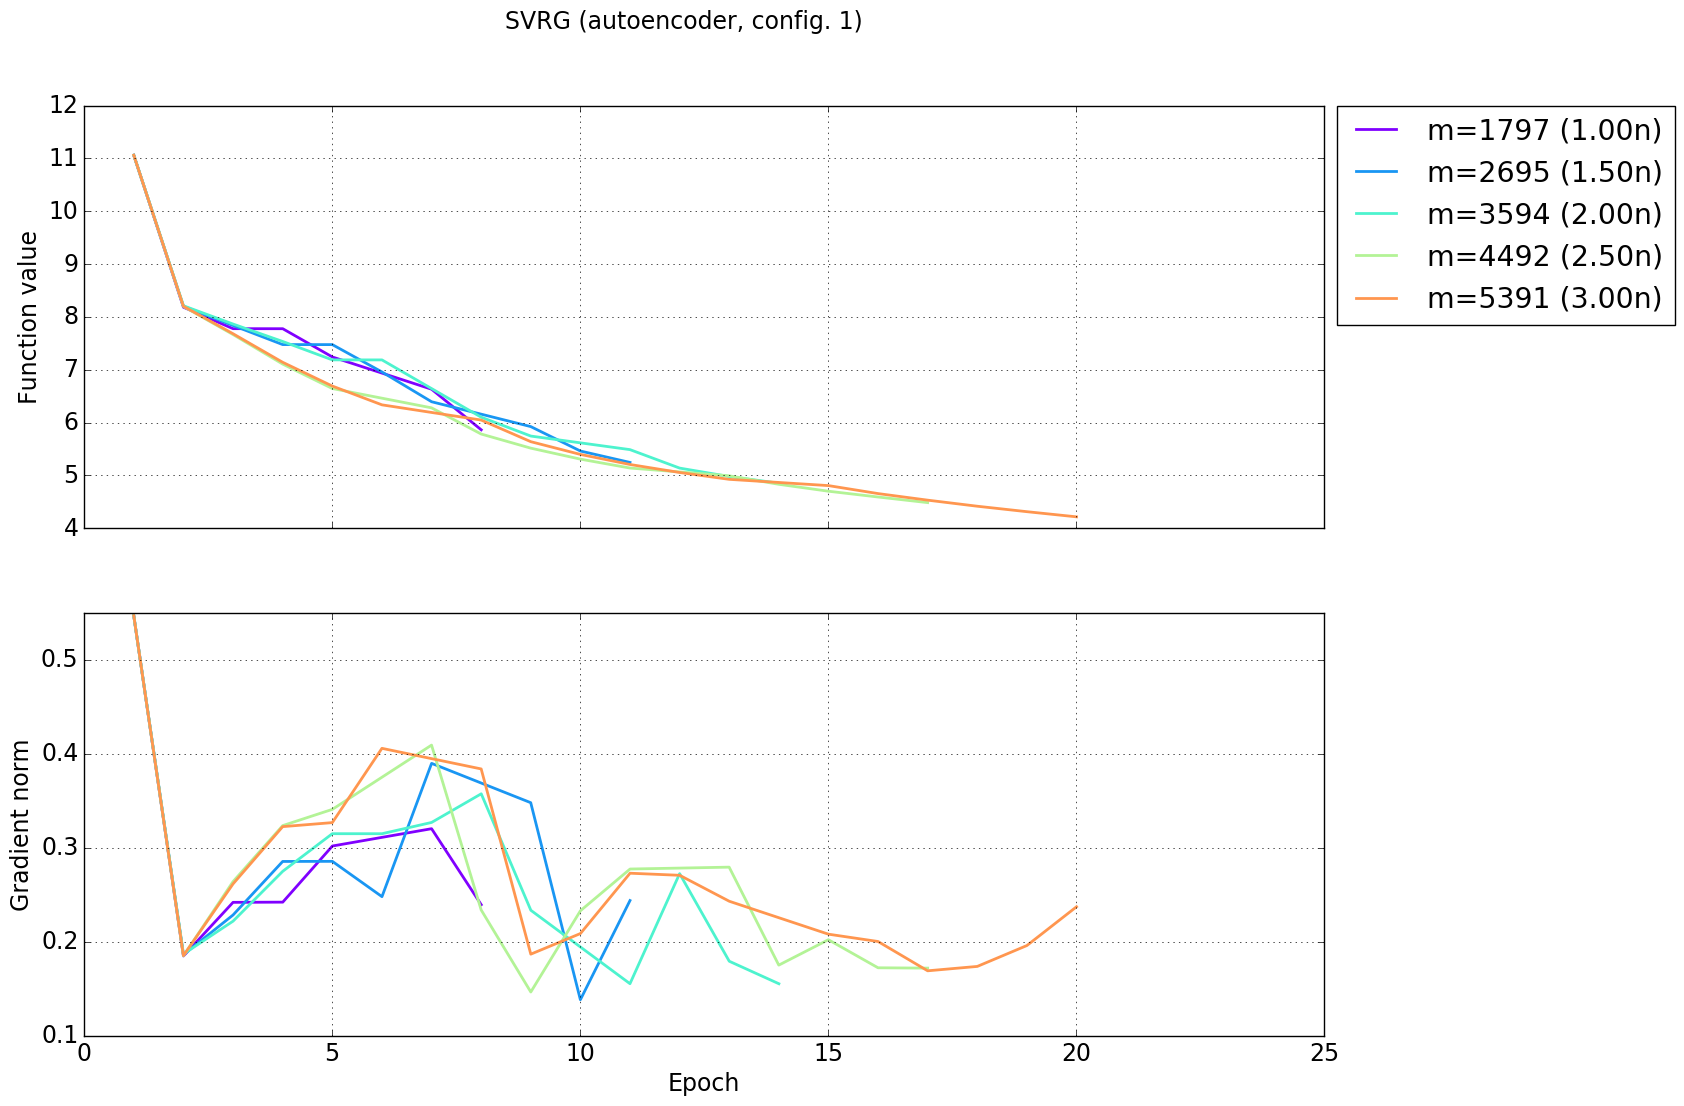

In [43]:
plot_svrg(Ms, hist_svrg_I, title='SVRG (autoencoder, config. 1)', save_name='svrg_autoencoder_conf1')

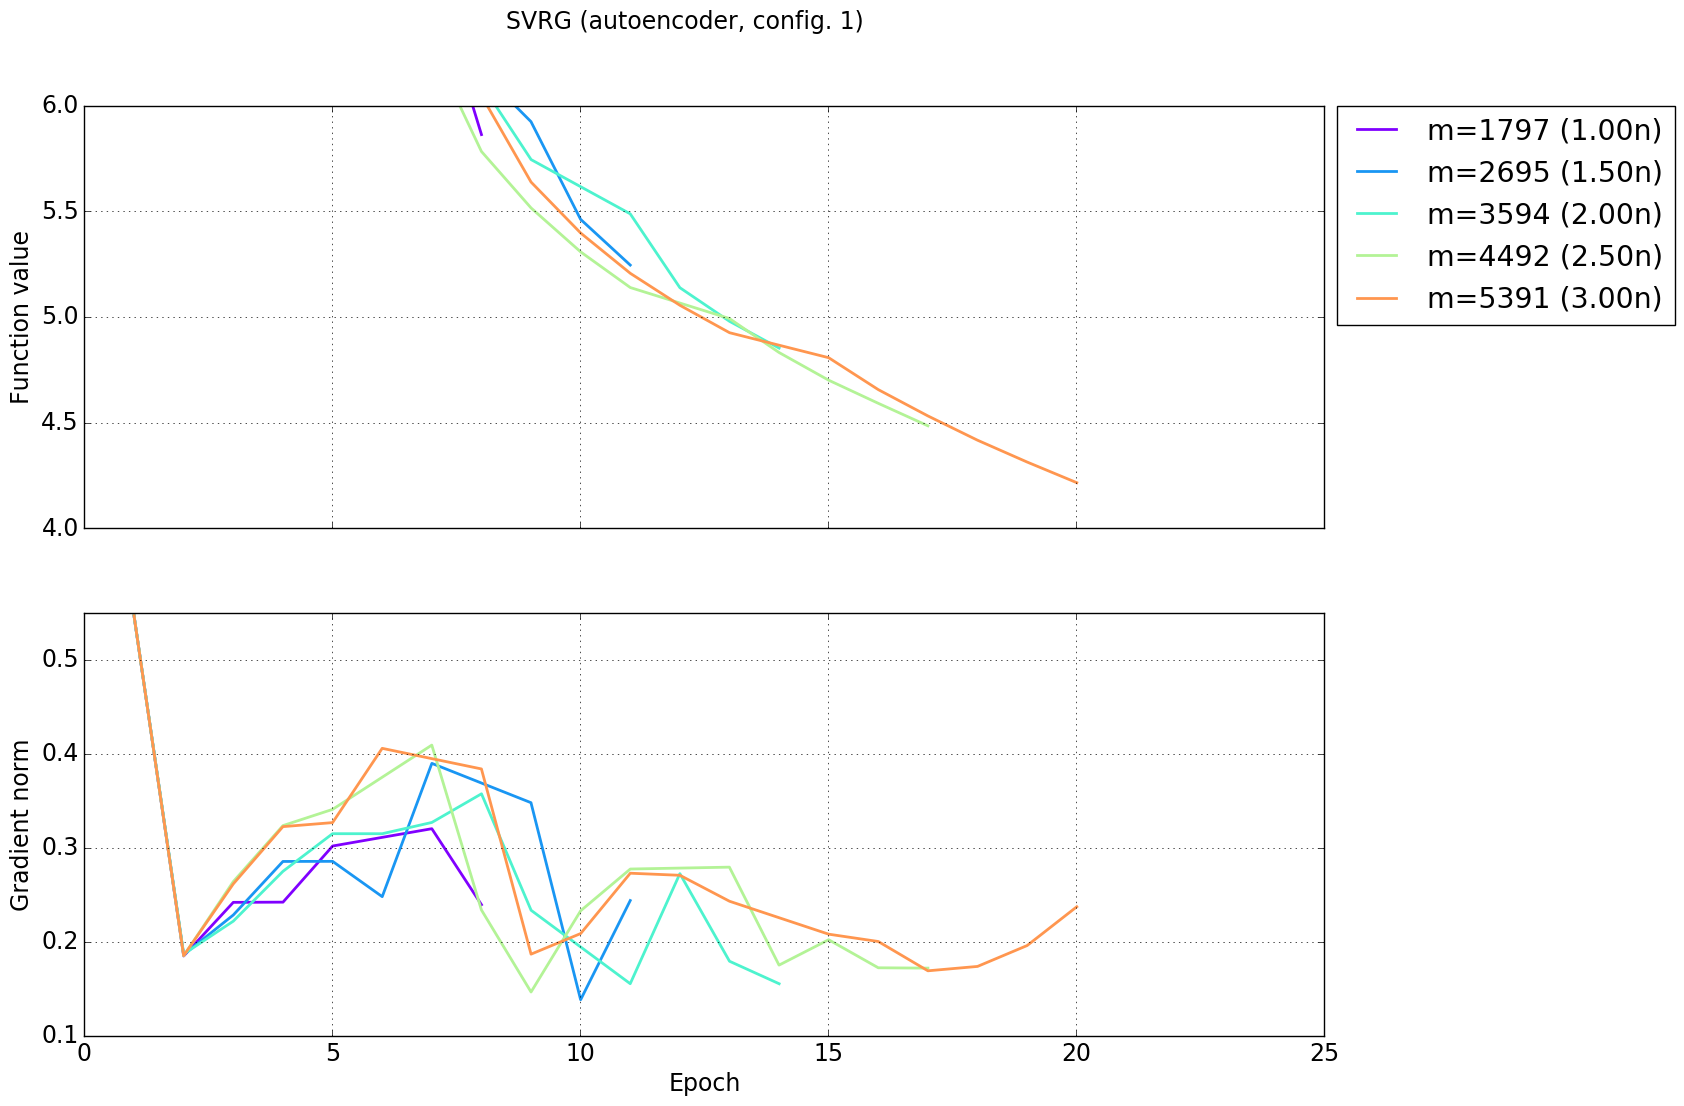

In [44]:
plot_svrg(Ms, hist_svrg_I, zoom1=(4, 6), title='SVRG (autoencoder, config. 1)', save_name='svrg_autoencoder_conf1_zoomed')

### $s = 5; d_1 = d_5 = 64; d_2 = d_4 = 30; d_3 = 2; \sigma_3(x) = x; \sigma_2(x) = \sigma_4(x) = \sigma_5(x) = sigm(x)$

In [19]:
# Describe autoencoder architecture
arch = {
    'n_layers': 5,                 # Number of layers: s
    'sizes': [64, 30, 2, 30, 64],          # Layer sizes: d_1, d_2, d_3
    'afuns': [sigmfun, linfun, sigmfun, sigmfun],    # Activation functions: sigma_2, sigma_3
    'dafuns': [dsigmfun, dlinfun, dsigmfun, dsigmfun], # Derivatives of act. functions: sigma_2', sigma_3'
}

In [20]:
%%time
N = 5
Ns = range(N + 1)

x_sgd_II = []
hist_sgd_II = []
for n in Ns:
    x, hist = test_sgd_ae(A, arch, step_size=10 ** -n)
    x_sgd_II += [x]
    hist_sgd_II += [hist]

CPU times: user 27.5 s, sys: 16.7 ms, total: 27.5 s
Wall time: 27.5 s


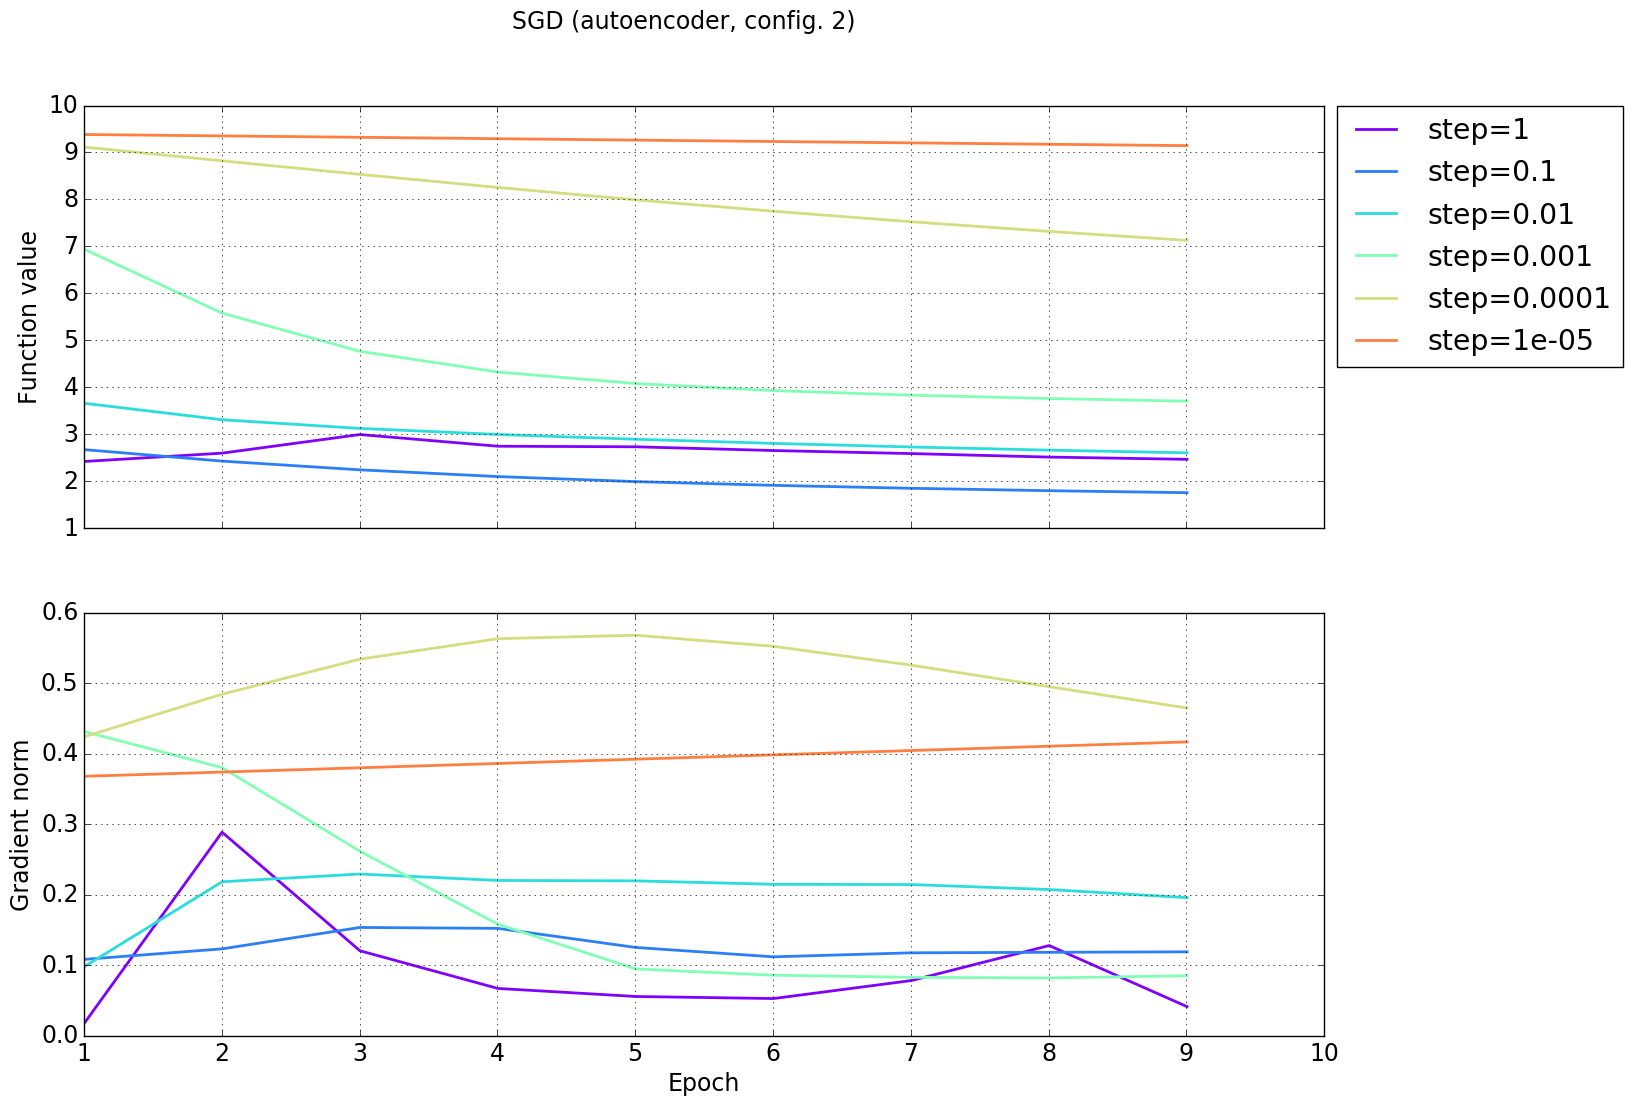

In [45]:
plot_sgd(Ns, hist_sgd_II, title='SGD (autoencoder, config. 2)', save_name='sgd_autoencoder_conf2')

In [21]:
%%time
n = A.shape[0]
M = 5
Ms = np.linspace(n, 3 * n, M, dtype=np.int)

x_svrg_II = []
hist_svrg_II = []
for m in Ms:
    x, hist = test_svrg_ae(A, arch, n_inner_iters=m)
    x_svrg_II += [x]
    hist_svrg_II += [hist]

CPU times: user 30.6 s, sys: 53.3 ms, total: 30.7 s
Wall time: 30.7 s


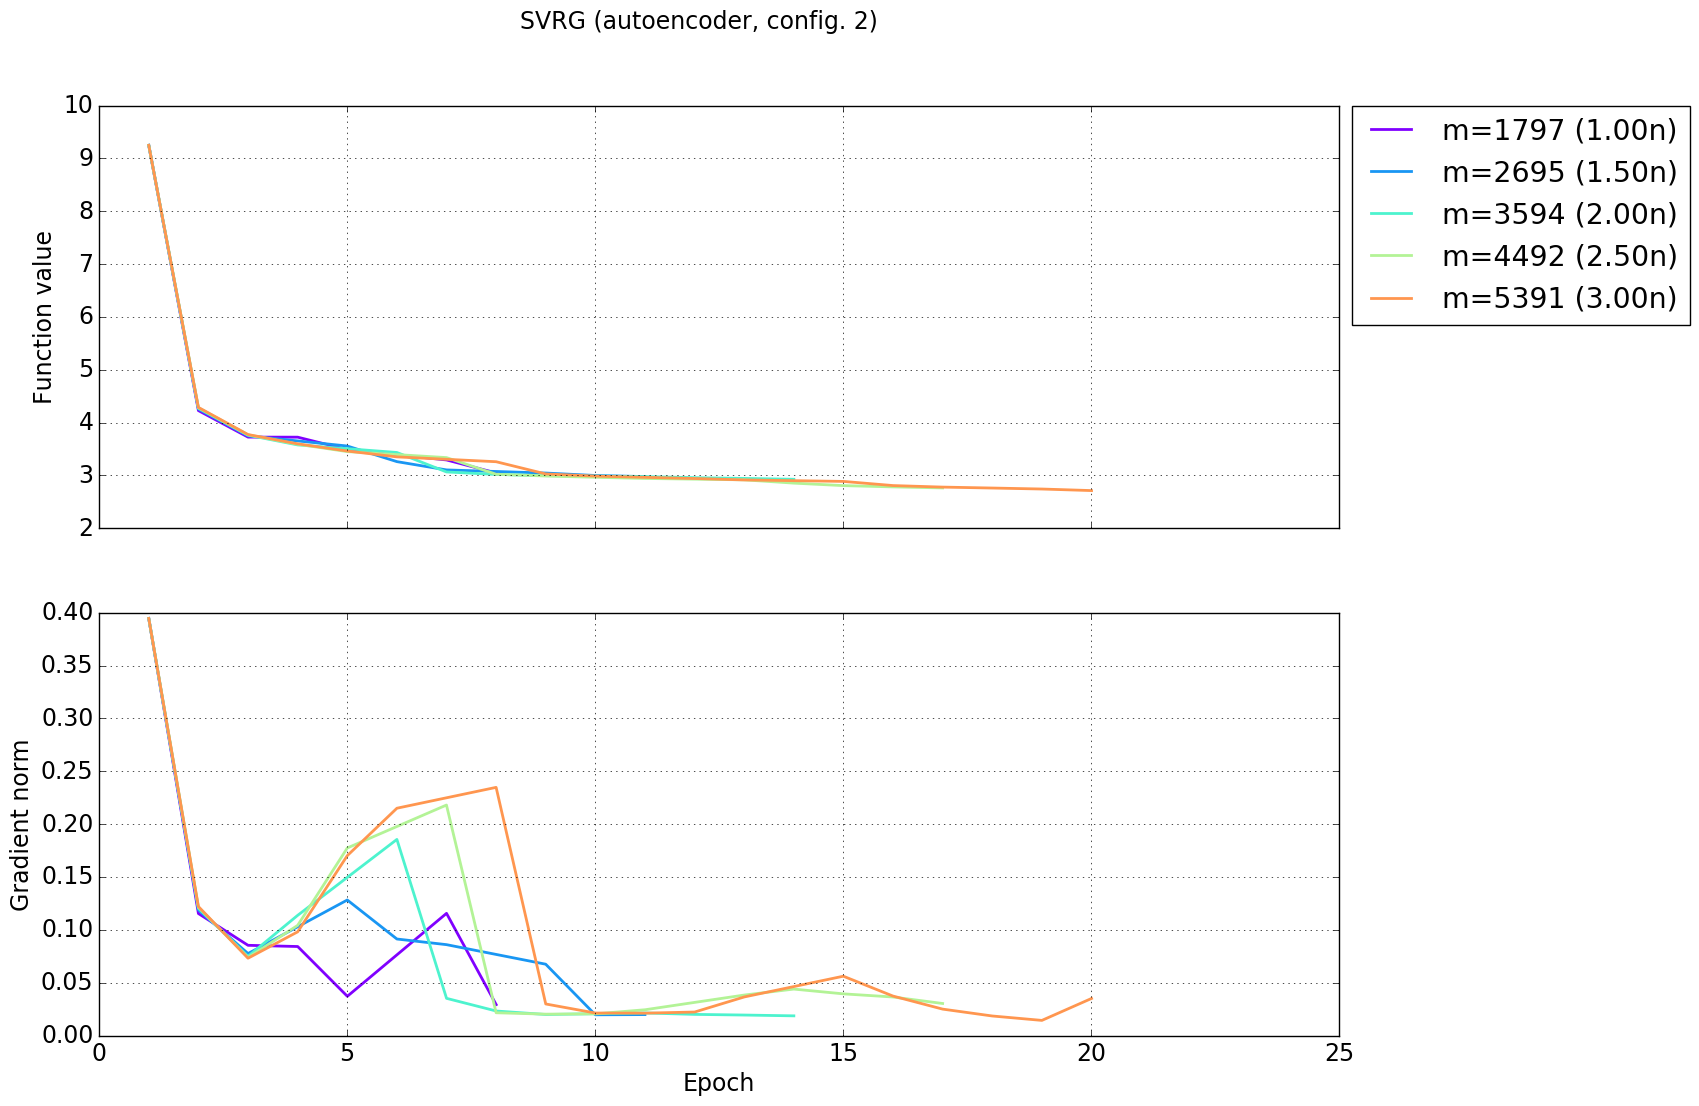

In [46]:
plot_svrg(Ms, hist_svrg_II, title='SVRG (autoencoder, config. 2)', save_name='svrg_autoencoder_conf2')

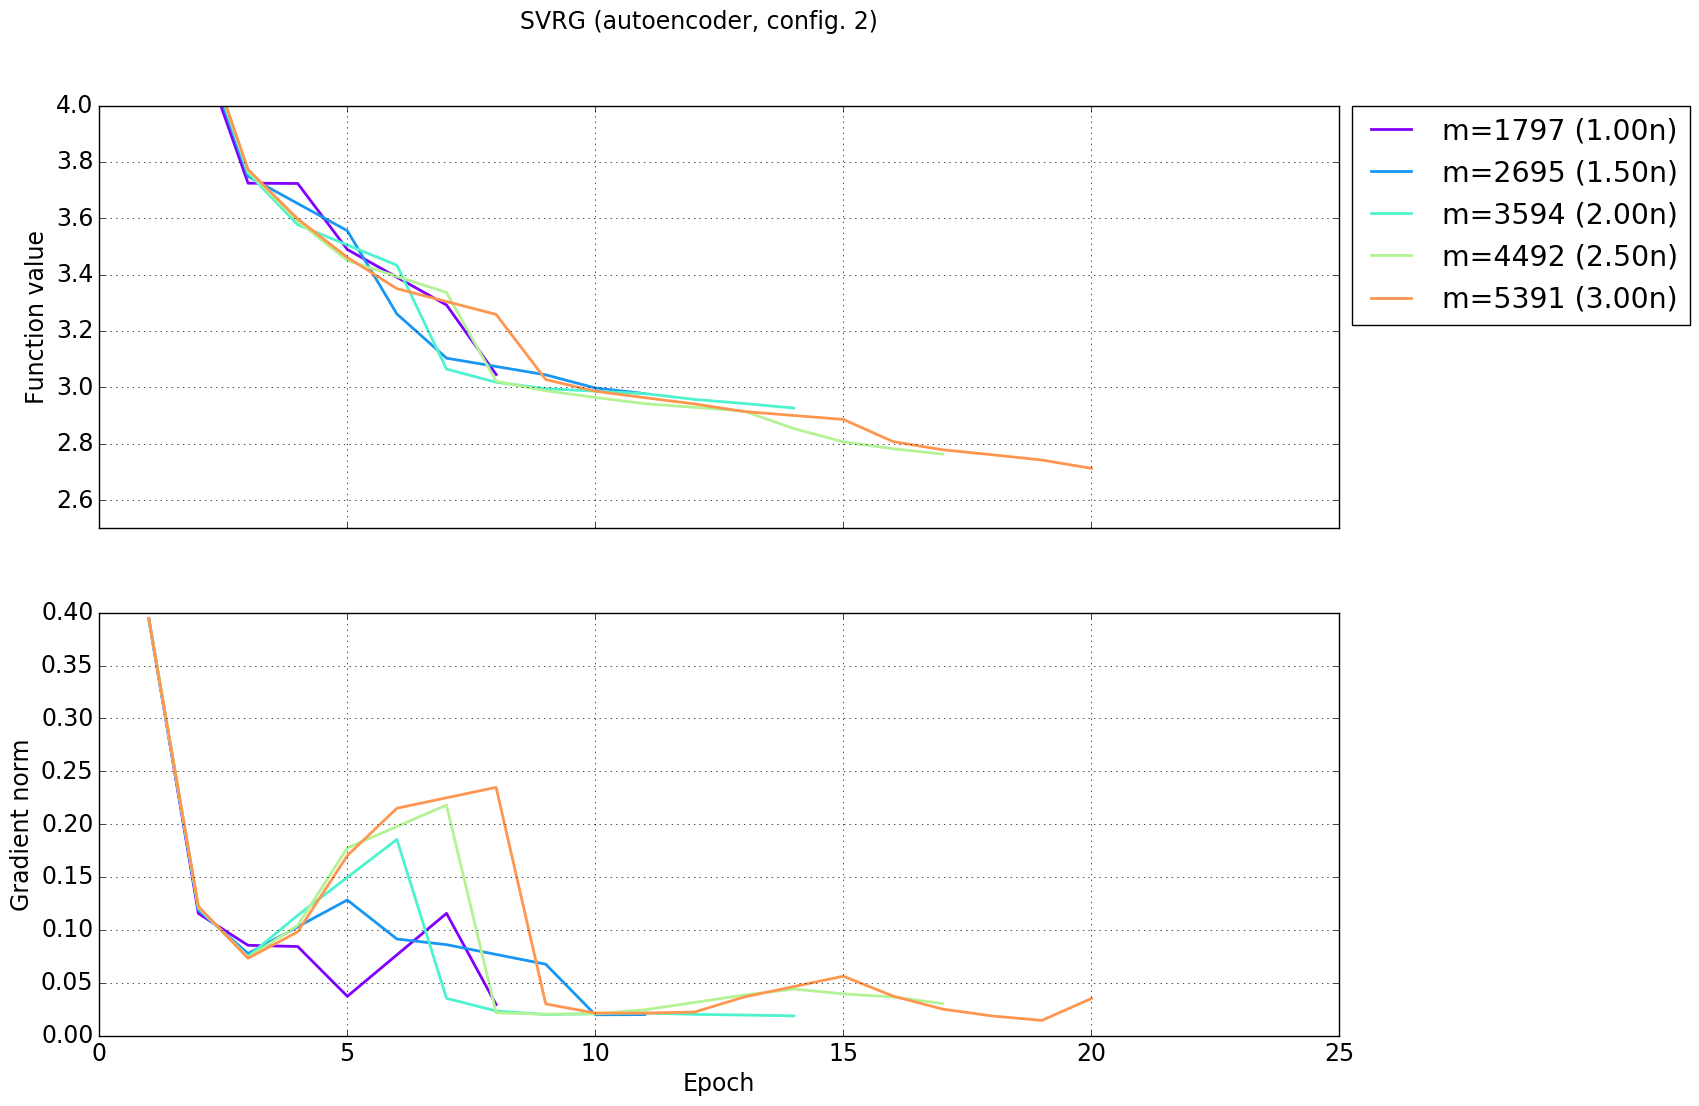

In [47]:
plot_svrg(Ms, hist_svrg_II, zoom1=(2.5, 4), title='SVRG (autoencoder, config. 2)', save_name='svrg_autoencoder_conf2_zoomed')

<br>
<br>
<br>

# Comparing SGD and SVRG methods

In [72]:
def plot_cmp(hist_sgd, hist_svrg, zoom1=None, zoom2=None, title='', save_name=''):
    plt.figure(figsize=(16, 12))
    plt.suptitle(title)
    
    ax1 = plt.subplot(211)
    plt.plot(hist_sgd['epoch'], hist_sgd['f'], label='SGD', linewidth=2)
    plt.plot(hist_svrg['epoch'], hist_svrg['f'], label='SVRG', linewidth=2)
    if zoom1:
        plt.ylim(zoom1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.ylabel('Function value')
    plt.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    plt.grid(True)

    plt.subplot(212, sharex=ax1)
    plt.plot(hist_sgd['epoch'], hist_sgd['norm_g'], linewidth=2)
    plt.plot(hist_svrg['epoch'], hist_svrg['norm_g'], linewidth=2)
    if zoom2:
        plt.ylim(zoom2)
    plt.xlabel('Epoch')
    plt.ylabel('Gradient norm')
    plt.grid(True)
        
    if save_name:
        plt.savefig("pics/" + save_name, bbox_inches='tight')
    plt.show()

In [58]:
from logistic import LossFuncSum
# from autoencoder import LossFuncSum
def compare(X, y):
    fsum = LossFuncSum(X, y, reg_coef=1 / X.shape[0])
    x0 = np.zeros(X.shape[1])

    return sgd(fsum, x0, n_iters=20 * fsum.n_funcs, trace=True), svrg(fsum, x0, n_stages=10, trace=True, save_grad=True)

In [60]:
%time (x_sgd_best_w5a, hist_sgd_best_w5a), (x_svrg_best_w5a, hist_svrg_best_w5a) = compare(X_w5a, y_w5a)

CPU times: user 7min 6s, sys: 113 ms, total: 7min 7s
Wall time: 7min 6s


In [61]:
%time (x_sgd_best_a9a, hist_sgd_best_a9a), (x_svrg_best_a9a, hist_svrg_best_a9a) = compare(X_a9a, y_a9a)

CPU times: user 19min 59s, sys: 973 ms, total: 20min
Wall time: 19min 59s


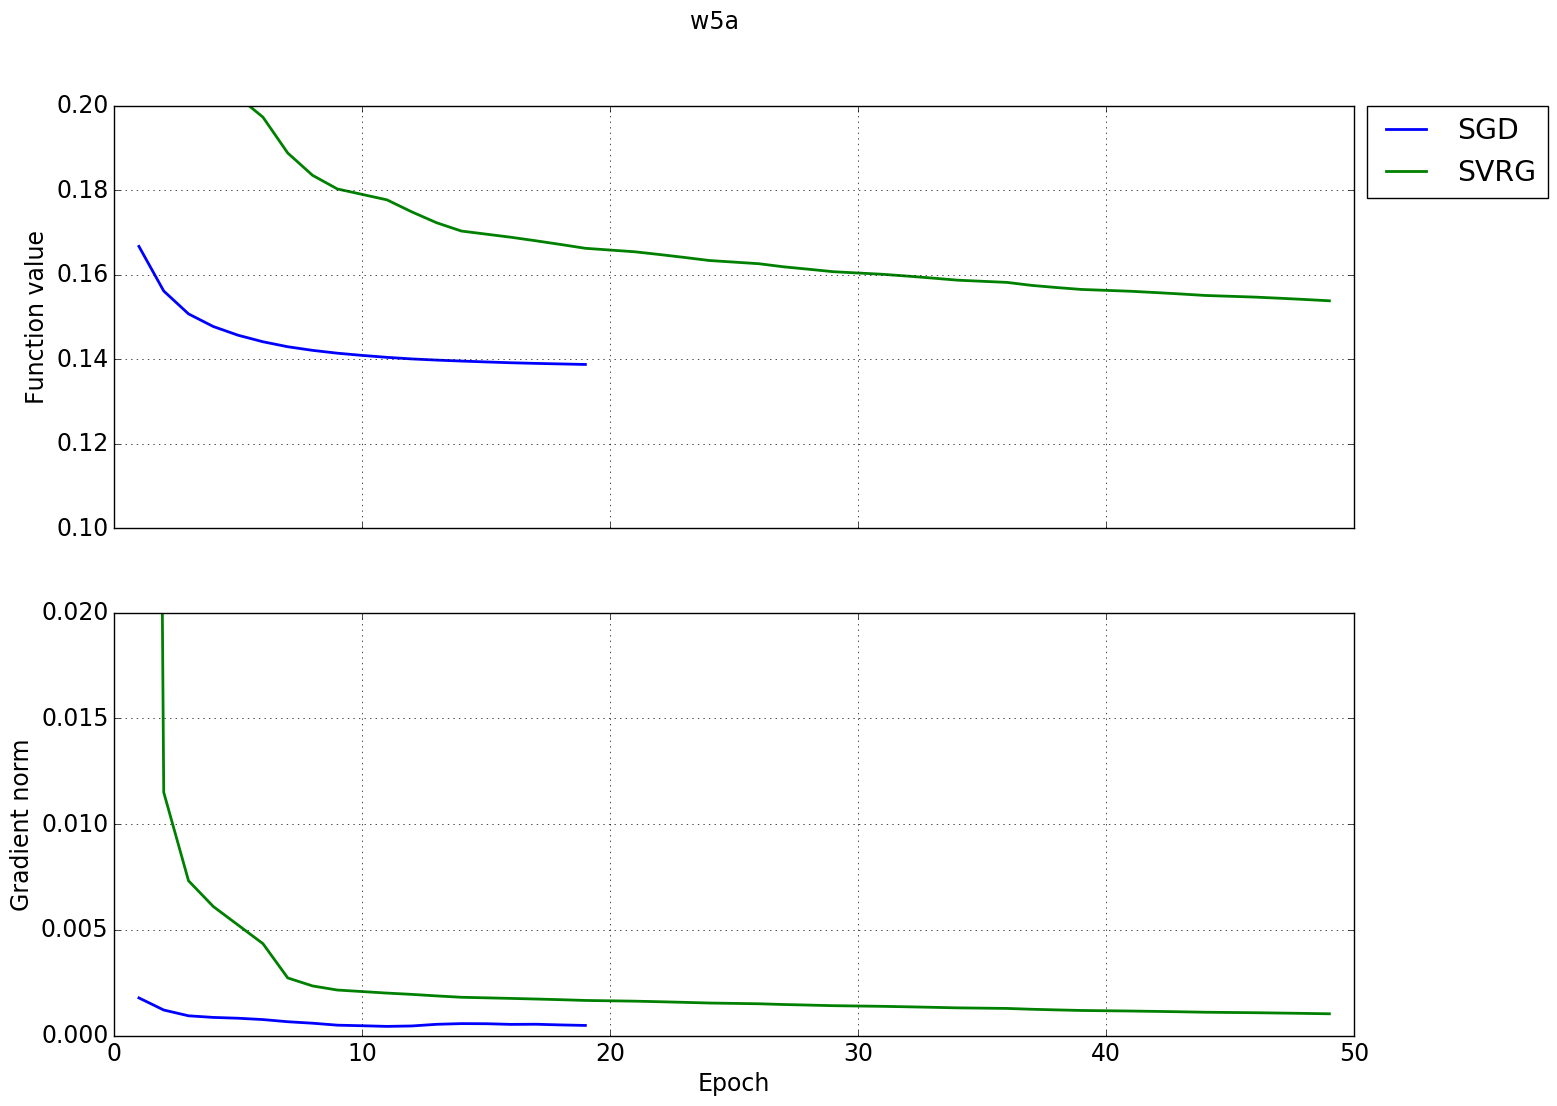

In [80]:
plot_cmp(hist_sgd_best_w5a, hist_svrg_best_w5a, zoom1=(0.1, 0.2), zoom2=(0, 0.02), title='w5a', save_name='cmp_w5a')

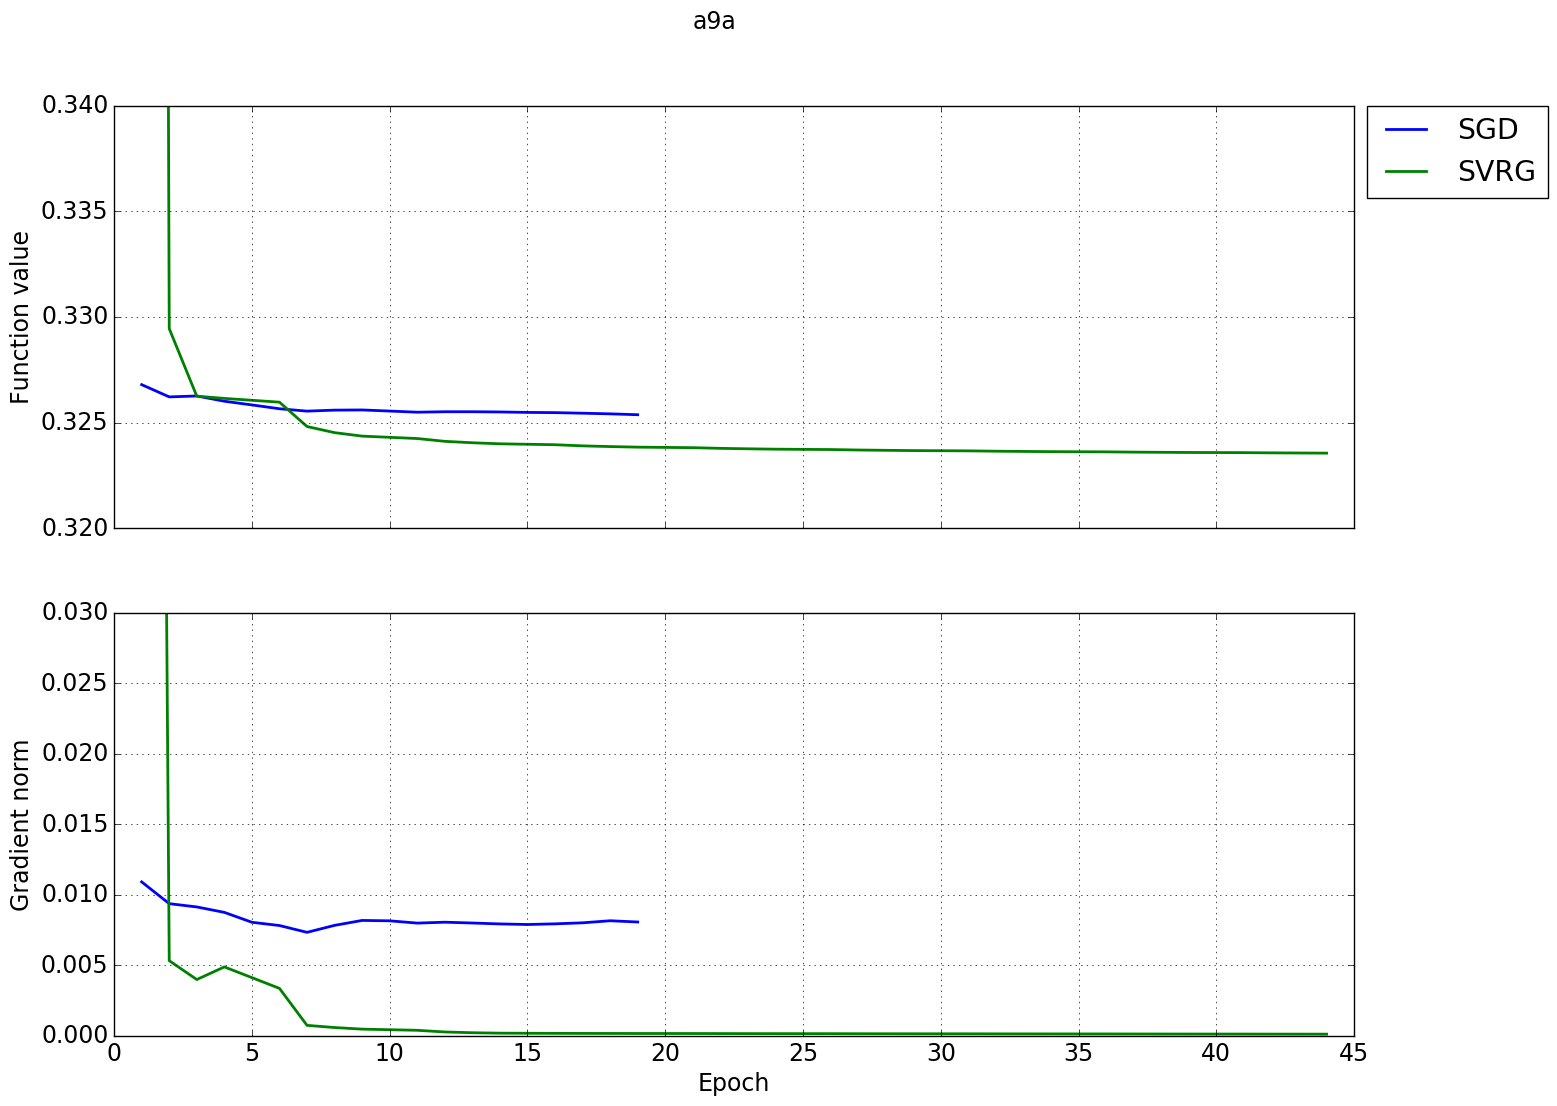

In [84]:
plot_cmp(hist_sgd_best_a9a, hist_svrg_best_a9a, zoom1=(0.32, 0.34), zoom2=(0, 0.03), title='a9a', save_name='cmp_a9a')

<br>

In [85]:
from autoencoder import LossFuncSum
def compare_ae(A, conf=1):
    # Define (element-wise) identity function and its derivative
    linfun = (lambda x: x)
    dlinfun = (lambda x: np.ones_like(x))
    # Define (element-wise) sigmoid function and its derivative
    sigmfun = expit
    dsigmfun = (lambda x: expit(x) * (1 - expit(x)))
    
    if conf == 1:
        # Describe autoencoder architecture
        arch = {
            'n_layers': 3,                 # Number of layers: s
            'sizes': [64, 2, 64],          # Layer sizes: d_1, d_2, d_3
            'afuns': [linfun, sigmfun],    # Activation functions: sigma_2, sigma_3
            'dafuns': [dlinfun, dsigmfun], # Derivatives of act. functions: sigma_2', sigma_3'
        }
    elif conf == 2:
        # Describe autoencoder architecture
        arch = {
            'n_layers': 5,                 # Number of layers: s
            'sizes': [64, 30, 2, 30, 64],          # Layer sizes: d_1, d_2, d_3
            'afuns': [sigmfun, linfun, sigmfun, sigmfun],    # Activation functions: sigma_2, sigma_3
            'dafuns': [dsigmfun, dlinfun, dsigmfun, dsigmfun], # Derivatives of act. functions: sigma_2', sigma_3'
        }
    
    fsum = LossFuncSum(A, arch)

    np.random.seed(0)
    x0 = np.random.randn(n_params_total(arch))

    return (
        sgd(fsum, x0, n_iters=20 * fsum.n_funcs, trace=True),
        svrg(fsum, x0, n_stages=10, trace=True, save_grad=True)
    )

In [86]:
%time (x_sgd_best_aeI, hist_sgd_best_aeI), (x_svrg_best_aeI, hist_svrg_best_aeI) = compare_ae(A, 1)

CPU times: user 17.2 s, sys: 3.33 ms, total: 17.2 s
Wall time: 17.2 s


In [87]:
%time (x_sgd_best_aeII, hist_sgd_best_aeII), (x_svrg_best_aeII, hist_svrg_best_aeII) = compare_ae(A, 2)

CPU times: user 27.3 s, sys: 56.7 ms, total: 27.4 s
Wall time: 27.4 s


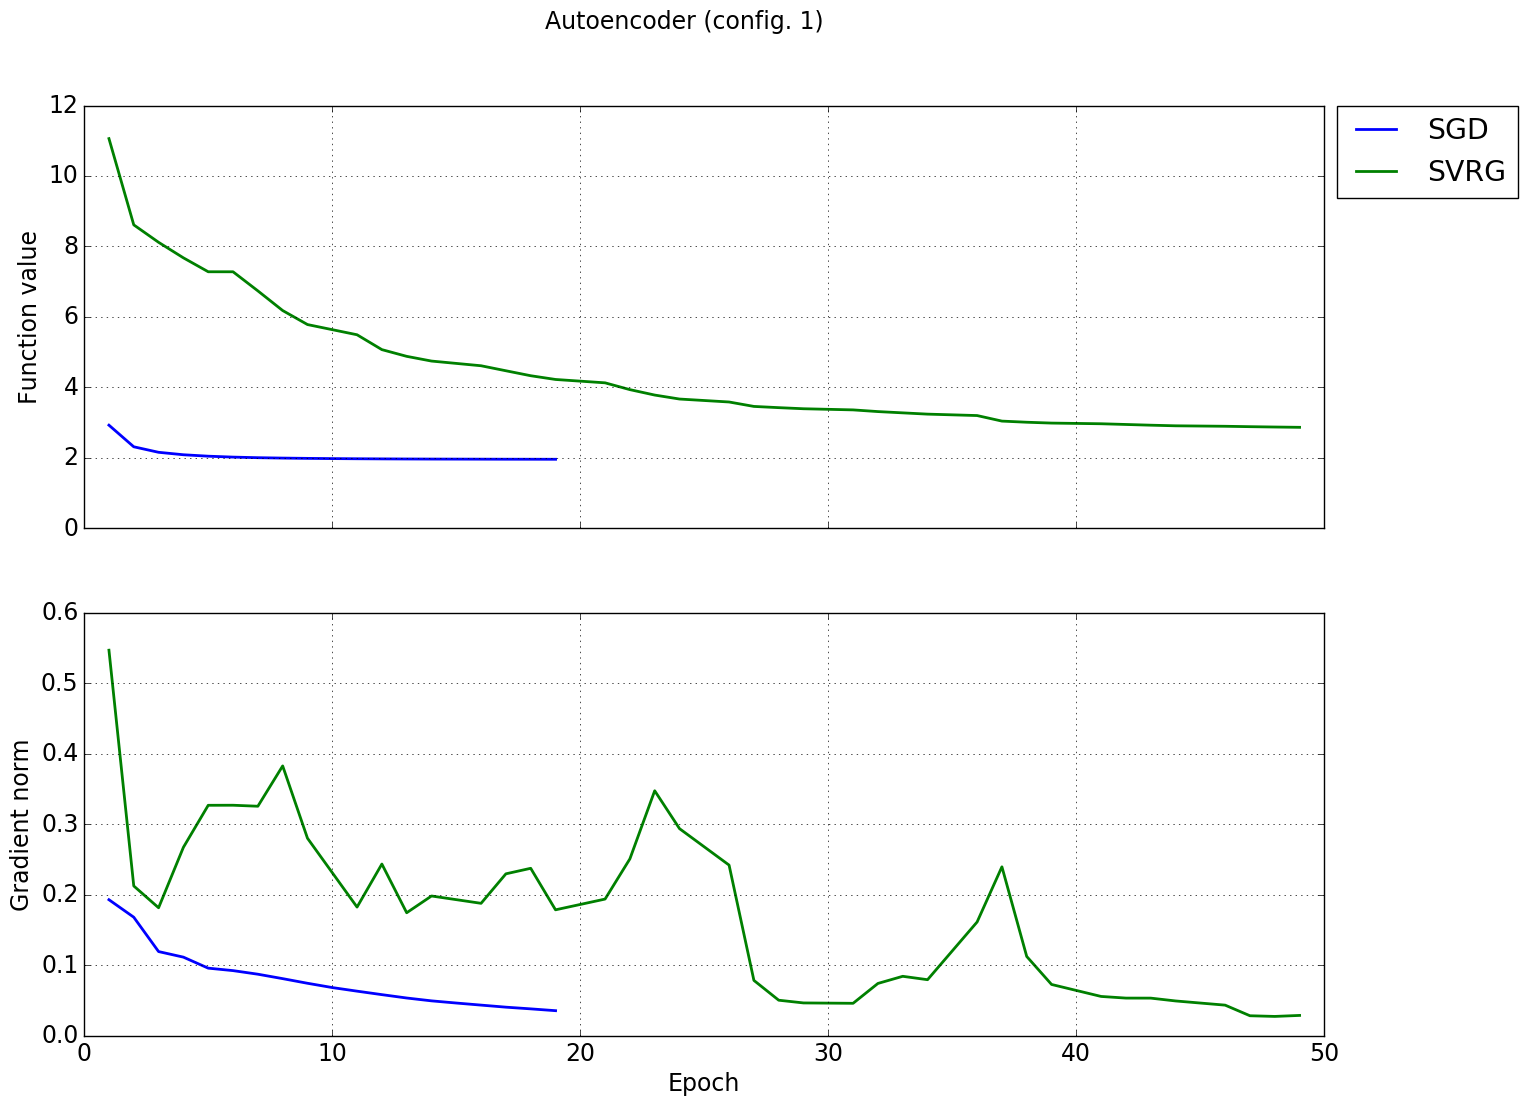

In [90]:
plot_cmp(hist_sgd_best_aeI, hist_svrg_best_aeI, title='Autoencoder (config. 1)', save_name='cmp_ae1')

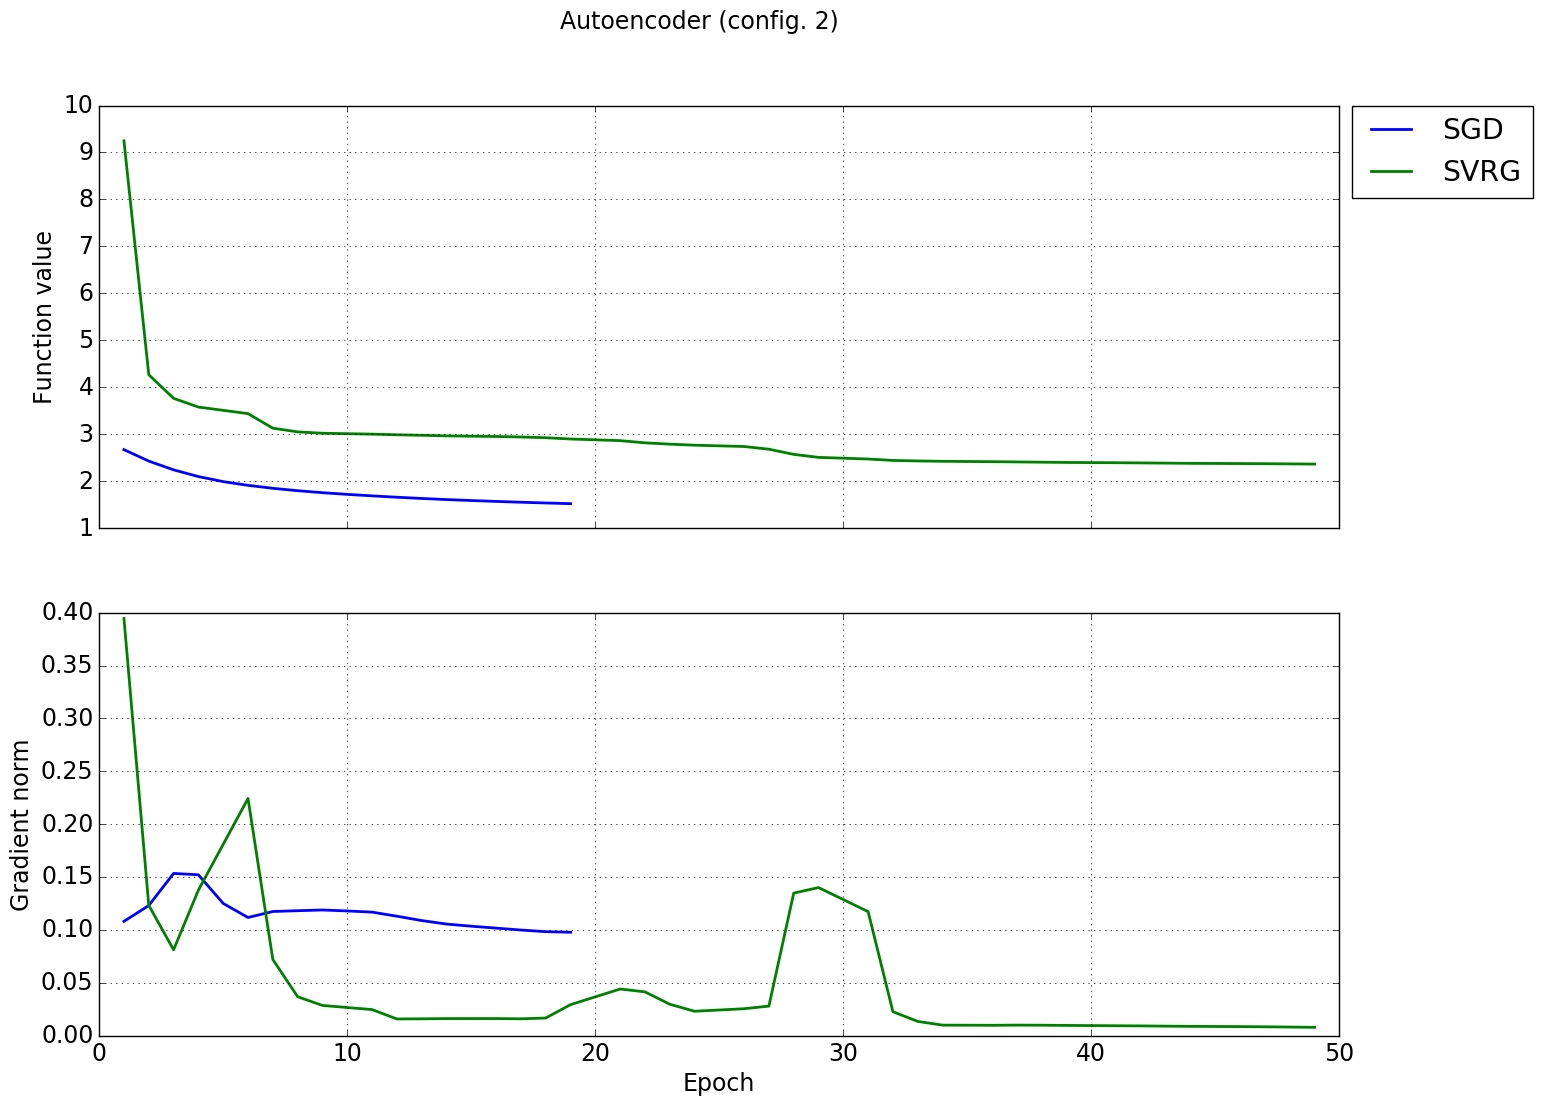

In [91]:
plot_cmp(hist_sgd_best_aeII, hist_svrg_best_aeII, title='Autoencoder (config. 2)', save_name='cmp_ae2')

In [92]:
# Describe autoencoder architecture
arch1 = {
    'n_layers': 3,                 # Number of layers: s
    'sizes': [64, 2, 64],          # Layer sizes: d_1, d_2, d_3
    'afuns': [linfun, sigmfun],    # Activation functions: sigma_2, sigma_3
    'dafuns': [dlinfun, dsigmfun], # Derivatives of act. functions: sigma_2', sigma_3'
}

# Describe autoencoder architecture
arch2 = {
    'n_layers': 5,                 # Number of layers: s
    'sizes': [64, 30, 2, 30, 64],          # Layer sizes: d_1, d_2, d_3
    'afuns': [sigmfun, linfun, sigmfun, sigmfun],    # Activation functions: sigma_2, sigma_3
    'dafuns': [dsigmfun, dlinfun, dsigmfun, dsigmfun], # Derivatives of act. functions: sigma_2', sigma_3'
}

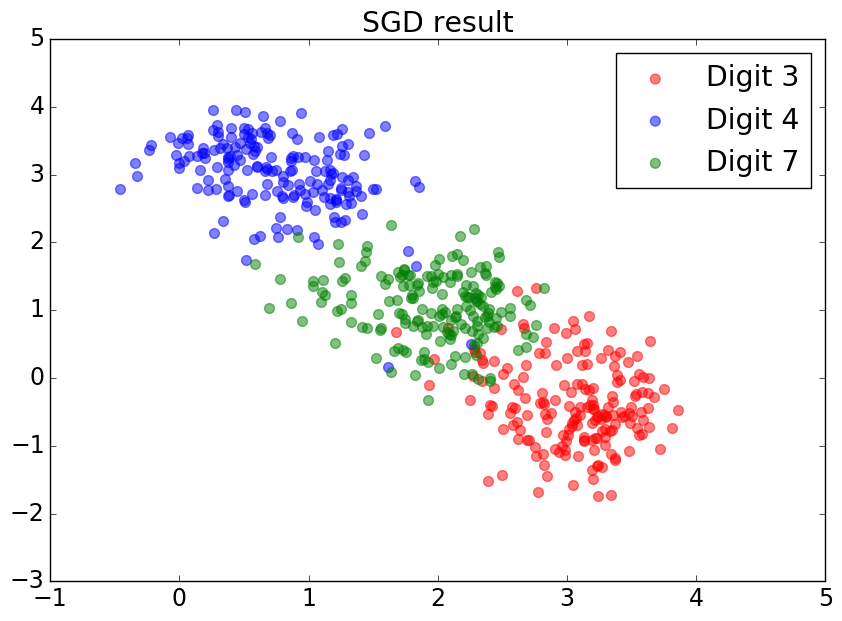

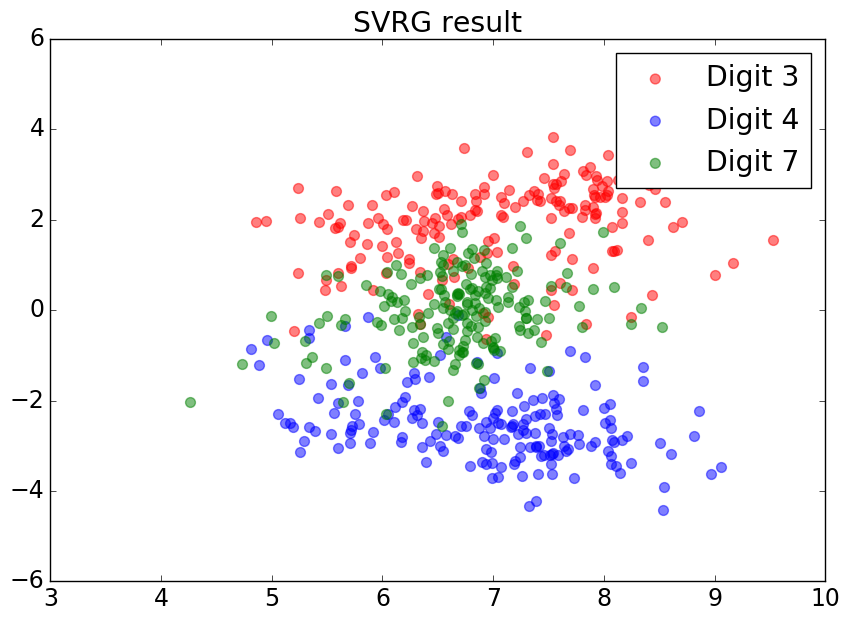

In [96]:
from autoencoder import compute_vals, unpack
# Define auxuiliary function for plotting results of autoencoder
def plot_result(x, arch, title, digits=[3, 4, 7], colors=['r', 'b', 'g']):
    X_list = unpack(x, arch)
    Z_list = compute_vals(A, X_list, arch)[0]
    Z = Z_list[arch['n_layers']//2] # middle layer
    plt.figure(figsize=(10, 7))
    hs = []
    for dig, col in zip(digits, colors):
        mask = (labels == dig)
        h = plt.scatter(Z[0, mask], Z[1, mask], color=col, s=50, alpha=0.5)
        hs.append(h)
    plt.title(title)
    plt.legend(hs, ['Digit %s'%dig for dig in digits], scatterpoints=1)
    plt.show()
# Plot results
plot_result(x_sgd_best_aeI, arch1, 'SGD result')
plot_result(x_svrg_best_aeII, arch2, 'SVRG result')